<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5270 - Machine Learning</h1>
</div>

# <center>Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests </center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement, test and evaluate a decision tree model and a random forest model for classification tasks.**



**Guidelines**
* Download `weatherAUS.csv` and `penguins.csv` files from D2L. 
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections. 

**Procedure**
* Save your work as `IPYNB` file and submit to D2L `Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook. 

<div class="alert alert-block alert-info">

# Part 1: Activity 

</div>

# Question 1: Binary Classification Using Decision Trees and Random Forests
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `weatherAUS.csv` file into a dataset and perform the following: (Note: You should use your previous work from lab 2 to preprocess and visualize the dataset before building the models)

> **Q1.1.** Build a classification model using Decision Trees to predict the target variable `RainTomorrow` from the dataset.

> **Q1.2.** Evaluate and discuss the model performance.

> **Q1.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

> **Q1.4.** Evaluate and discuss the model performance after the pruning.

> **Q1.5.** Build a classification model using Random Forests to predict the target variable `RainTomorrow` from the dataset.

> **Q1.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

> **Q1.7.** Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab. 

> **Q1.8.** Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

**Q1. Preprocessing and visualizing the dataset**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
sns.set_palette('Set2')

In [2]:
dataset = pd.read_csv('weatherAUS.csv')
dataset.shape

(36881, 24)

In [3]:
dataset.head(10)

Date      Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0   5/18/2009        Hobart      5.1     14.3       0.0          1.8   
1    7/3/2009    Launceston      1.1     14.5       0.4          NaN   
2   2/18/2010   Williamtown     19.7     26.2       0.0          7.2   
3    3/4/2010  PerthAirport     16.6     28.0       0.0          9.0   
4    9/9/2010     GoldCoast     14.6     25.3       0.0          NaN   
5   9/28/2011       Mildura     15.7     27.3       0.0         11.2   
6  10/13/2011     Nuriootpa      9.8     23.9       0.0          4.4   
7    4/8/2010     NorahHead     18.7     27.6       3.0          NaN   
8  10/19/2009    Townsville     23.6     30.1       0.0         11.4   
9   2/23/2010  MountGambier      8.5     22.9       1.4          4.2   

   Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0       8.9          NW           30.0        WSW  ...        47.0   
1       NaN         SSW           50.0          E  ...        46.0   
2       7.2         SSE           41.0        SSE  ...        50.0   
3      11.3          SW           54.0        SSE  ...        41.0   
4       NaN         NNW           43.0        WNW  ...        67.0   
5       5.6           N           65.0        ENE  ...        86.0   
6      10.5          SE           35.0        ENE  ...        29.0   
7       NaN         SSE           41.0        WNW  ...        64.0   
8      10.8           E           57.0        ESE  ...        48.0   
9      12.5         SSW           41.0        SSE  ...        41.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1023.1       1022.2       1.0       1.0      9.1     13.3         No   
1       1001.5       1002.4       NaN       NaN      1.3     13.7         No   
2       1020.9       1021.9       6.0       4.0     22.7     24.4         No   
3       1018.3       1014.9       6.0       1.0     20.0     26.1         No   
4       1020.3       1015.0       NaN       NaN     22.2     22.6         No   
5       1002.0        995.5       8.0       7.0     18.1     18.5         No   
6       1017.8       1013.9       3.0       4.0     15.5     23.0         No   
7       1013.2       1011.0       NaN       NaN     22.4     24.0        Yes   
8       1020.9       1018.0       4.0       2.0     27.4     27.9         No   
9       1023.1       1022.1       1.0       2.0     16.4     22.1        Yes   

   RISK_MM  RainTomorrow  
0      0.0            No  
1      0.0            No  
2      0.2            No  
3      0.0            No  
4      0.4            No  
5      5.6           Yes  
6      0.2            No  
7      0.2            No  
8      0.0            No  
9      0.0            No  

[10 rows x 24 columns]

In [4]:
dataset.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [5]:
dataset.isna().sum()

Date                 0
Location             0
MinTemp            338
MaxTemp            242
Rainfall           626
Evaporation      12846
Sunshine         13564
WindGustDir       3368
WindGustSpeed     3361
WindDir9am        2809
WindDir3pm         962
WindSpeed9am       662
WindSpeed3pm       646
Humidity9am        570
Humidity3pm        511
Pressure9am       3572
Pressure3pm       3552
Cloud9am         12500
Cloud3pm         12982
Temp9am            487
Temp3pm            444
RainToday          626
RISK_MM            620
RainTomorrow       620
dtype: int64

In [6]:
# Droping the data where the value of a dependent variable is missing
dataset = dataset.dropna(subset=['RainTomorrow'])

In [7]:
dataset['RainTomorrow'].value_counts()

RainTomorrow
No     27732
Yes     8529
Name: count, dtype: int64

In [8]:
# Balancing the dataset to have an equal number of rows for each class
no_samples = dataset[dataset['RainTomorrow'] == 'No']
yes_samples = dataset[dataset['RainTomorrow'] == 'Yes']

dataset = pd.concat([no_samples.sample(n=len(yes_samples), replace=False), yes_samples])

# Shuffling the dataset
dataset = dataset.sample(frac=1).reset_index(drop=True)

In [9]:
dataset['RainTomorrow'].value_counts()

RainTomorrow
No     8529
Yes    8529
Name: count, dtype: int64

In [10]:
dataset.isna().sum()

Date                0
Location            0
MinTemp           102
MaxTemp            43
Rainfall          218
Evaporation      5876
Sunshine         6178
WindGustDir      1471
WindGustSpeed    1467
WindDir9am       1172
WindDir3pm        415
WindSpeed9am      246
WindSpeed3pm      256
Humidity9am       204
Humidity3pm       186
Pressure9am      1563
Pressure3pm      1551
Cloud9am         5673
Cloud3pm         5843
Temp9am           176
Temp3pm           165
RainToday         218
RISK_MM             0
RainTomorrow        0
dtype: int64

In [11]:
# Imputing data for numeric columns
from sklearn.impute import KNNImputer
numeric_columns = dataset.select_dtypes(include='number').columns
imputer = KNNImputer()
dataset[numeric_columns] = imputer.fit_transform(dataset[numeric_columns])

In [12]:
# Imputing data for string columns
string_columns = dataset.select_dtypes(include='object').columns
for column in string_columns:
    mode_value = dataset[column].mode()[0]
    dataset[column] = dataset[column].fillna(mode_value)

In [13]:
dataset.isna().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64


Unique values for Date column: ['9/13/2009' '10/2/2010' '2/28/2009' ... '1/19/2008' '11/23/2008'
 '11/23/2007']

Unique values for Location column: ['Perth' 'GoldCoast' 'Melbourne' 'Dartmoor' 'Nuriootpa' 'MelbourneAirport'
 'Albany' 'Ballarat' 'Townsville' 'Hobart' 'Darwin' 'Williamtown' 'Cobar'
 'Richmond' 'Brisbane' 'Adelaide' 'Sydney' 'Penrith' 'SalmonGums'
 'AliceSprings' 'Witchcliffe' 'WaggaWagga' 'PearceRAAF' 'Albury'
 'NorahHead' 'BadgerysCreek' 'Tuggeranong' 'NorfolkIsland' 'Canberra'
 'Woomera' 'SydneyAirport' 'Wollongong' 'Launceston' 'Watsonia' 'Moree'
 'CoffsHarbour' 'Walpole' 'Cairns' 'MountGambier' 'Portland' 'Newcastle'
 'Mildura' 'PerthAirport' 'Bendigo' 'MountGinini' 'Sale']


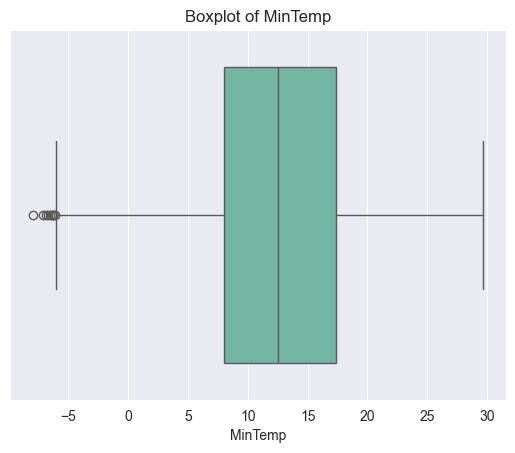

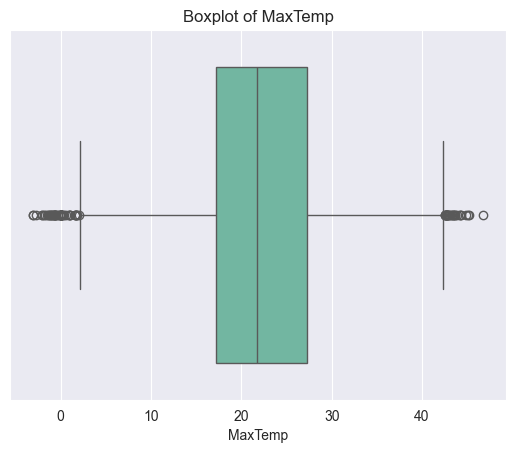

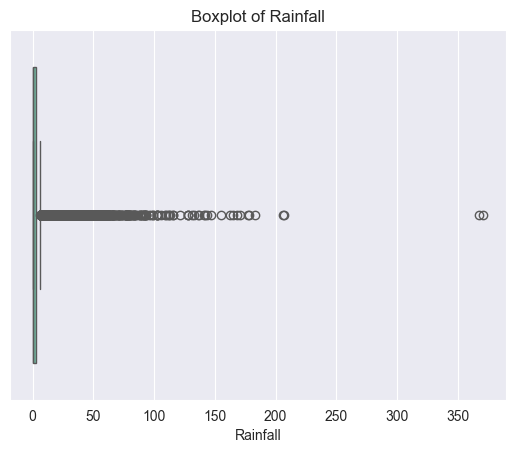

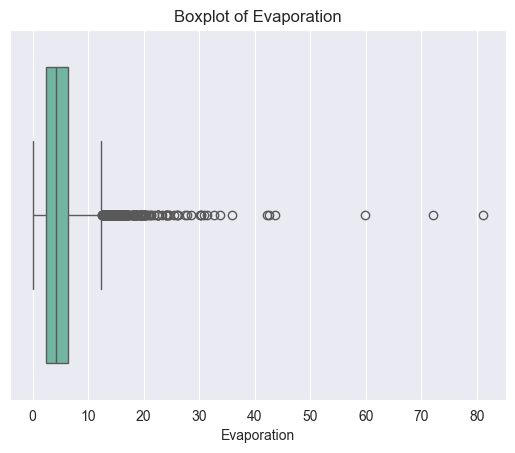

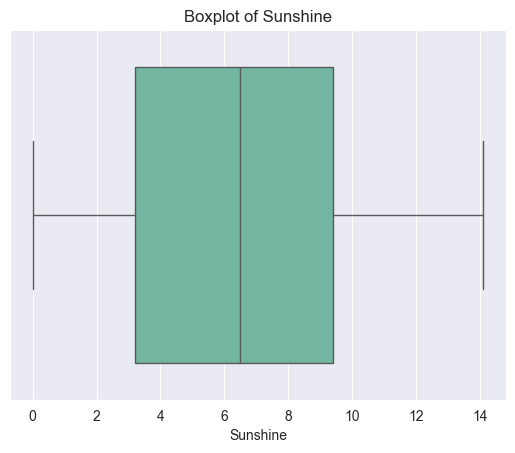


Unique values for WindGustDir column: ['WSW' 'ESE' 'S' 'N' 'SSE' 'W' 'NNW' 'NNE' 'WNW' 'E' 'NW' 'SW' 'SE' 'SSW'
 'ENE' 'NE']


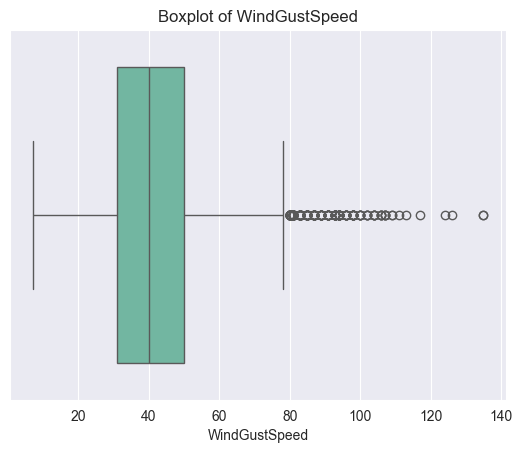


Unique values for WindDir9am column: ['SE' 'SW' 'N' 'SSW' 'E' 'ESE' 'S' 'ENE' 'W' 'WSW' 'NNE' 'NE' 'NW' 'WNW'
 'SSE' 'NNW']

Unique values for WindDir3pm column: ['W' 'S' 'SSE' 'NNW' 'SE' 'ESE' 'WSW' 'ENE' 'WNW' 'NE' 'E' 'NW' 'N' 'SSW'
 'SW' 'NNE']


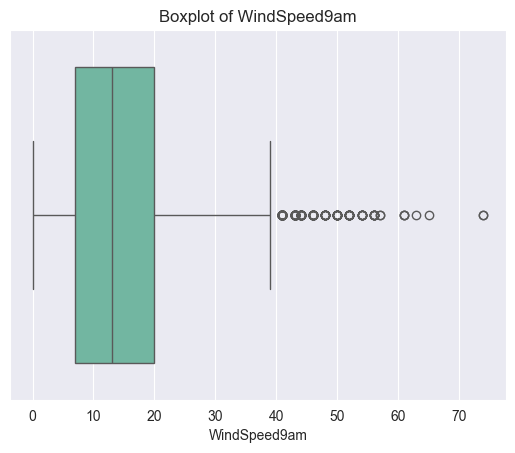

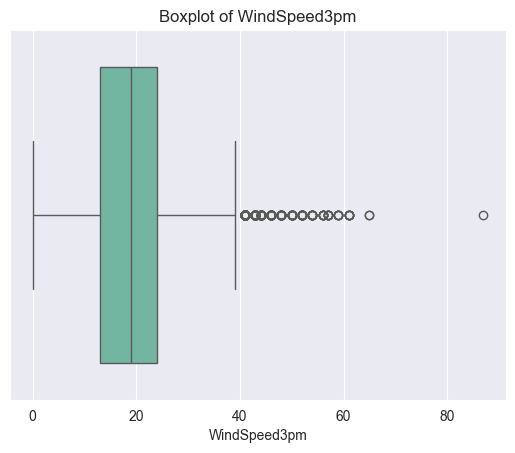

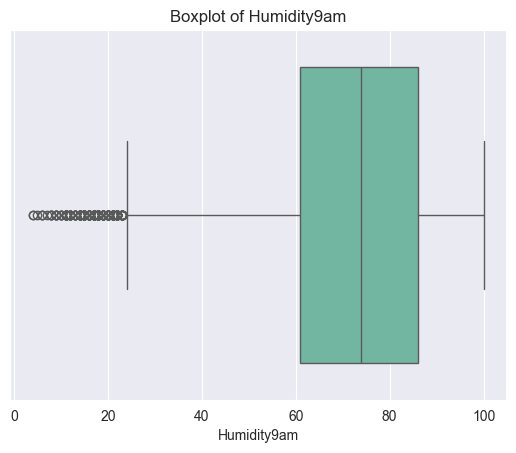

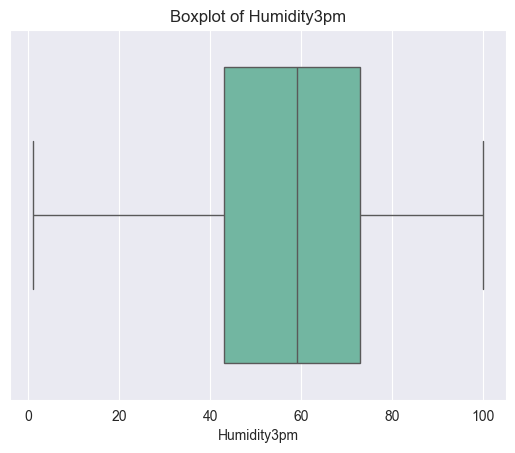

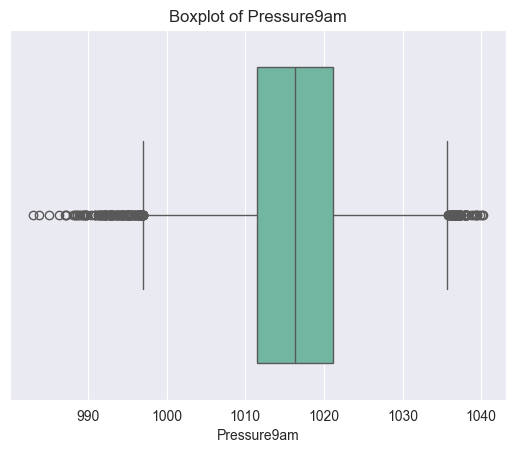

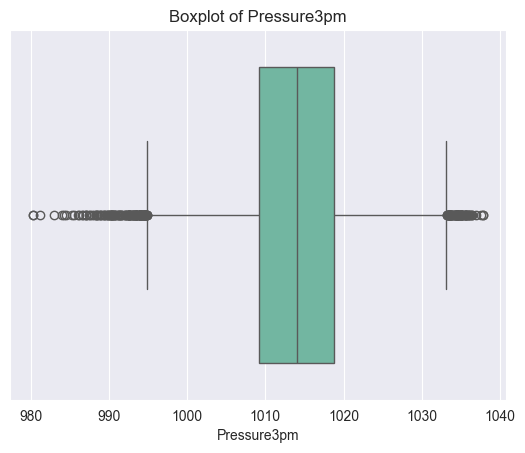

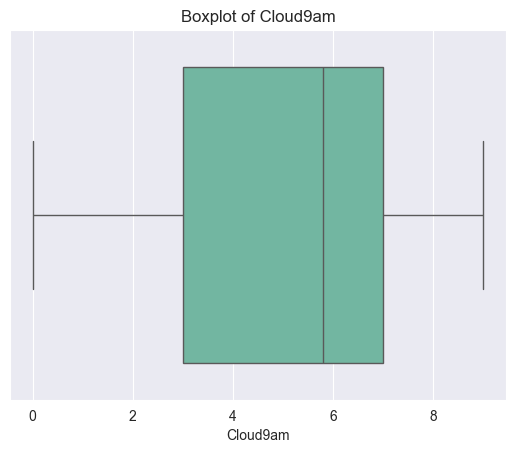

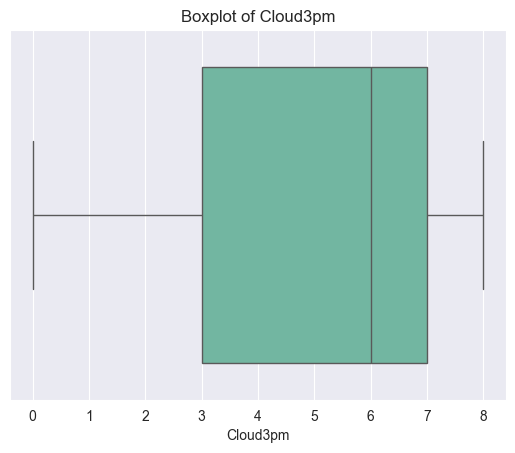

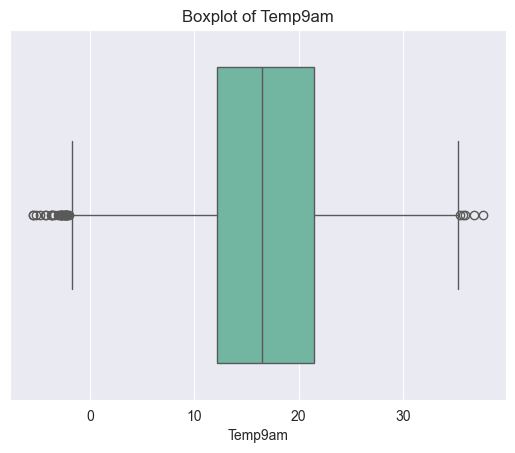

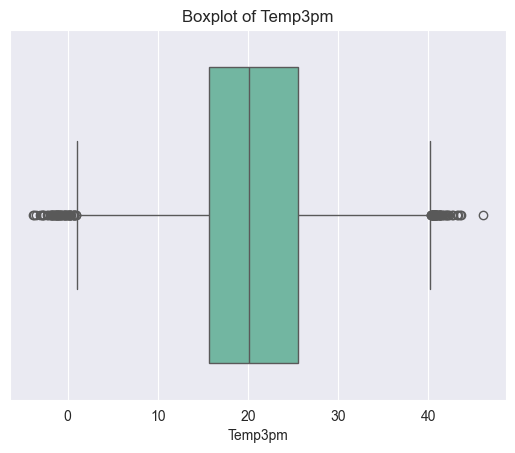


Unique values for RainToday column: ['No' 'Yes']


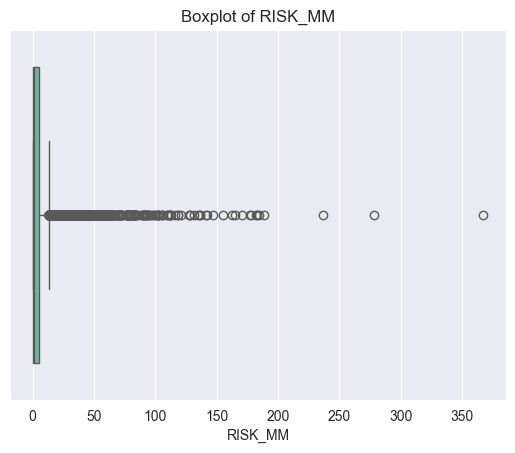


Unique values for RainTomorrow column: ['No' 'Yes']


In [14]:
for column in dataset.columns:
    if dataset[column].dtype in ['int64', 'float64']:
        sns.boxplot(x=dataset[column])
        plt.title(f'Boxplot of {column}')
        plt.show()
    else:
        print('\nUnique values for', column, 'column:', dataset[column].unique())

In [15]:
# Remove outliers for numeric data using Isolation Forest
from sklearn.ensemble import IsolationForest
numeric_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
iso_forest = IsolationForest(contamination=0.05)
outlier_mask = iso_forest.fit_predict(dataset[numeric_columns])
dataset = dataset[outlier_mask != -1]

In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16205 entries, 0 to 17057
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           16205 non-null  object 
 1   Location       16205 non-null  object 
 2   MinTemp        16205 non-null  float64
 3   MaxTemp        16205 non-null  float64
 4   Rainfall       16205 non-null  float64
 5   Evaporation    16205 non-null  float64
 6   Sunshine       16205 non-null  float64
 7   WindGustDir    16205 non-null  object 
 8   WindGustSpeed  16205 non-null  float64
 9   WindDir9am     16205 non-null  object 
 10  WindDir3pm     16205 non-null  object 
 11  WindSpeed9am   16205 non-null  float64
 12  WindSpeed3pm   16205 non-null  float64
 13  Humidity9am    16205 non-null  float64
 14  Humidity3pm    16205 non-null  float64
 15  Pressure9am    16205 non-null  float64
 16  Pressure3pm    16205 non-null  float64
 17  Cloud9am       16205 non-null  float64
 18  Cloud3pm   

In [17]:
# The column 'Date' seems unnecessary in predicting the dependent variable 'RainTomorrow', so let's drop that column
columns_to_drop = ['Date']
dataset = dataset.drop(columns=columns_to_drop)

In [18]:
# Label Encoding
dataset['Location'] = dataset['Location'].astype('category').cat.codes
dataset['WindGustDir'] = dataset['WindGustDir'].astype('category').cat.codes
dataset['WindDir9am'] = dataset['WindDir9am'].astype('category').cat.codes
dataset['WindDir3pm'] = dataset['WindDir3pm'].astype('category').cat.codes
dataset['RainToday'] = dataset['RainToday'].astype('category').cat.codes

In [19]:
dataset.RainTomorrow.replace(['Yes', 'No'], [1,0], inplace=True)

In [20]:
dataset.RainTomorrow.value_counts()

RainTomorrow
0    8201
1    8004
Name: count, dtype: int64

In [21]:
dataset

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0            29      9.2     18.7       1.0         2.60      6.80   
1            14     15.6     19.7       2.2         3.92      0.48   
2            17     16.1     23.2       0.0        12.40      6.30   
3            12     10.2     15.4      23.8         2.20      8.80   
4            26     13.0     27.4       0.0         4.40     13.80   
...         ...      ...      ...       ...          ...       ...   
17053         7     22.8     29.5       0.6         7.60      5.90   
17054        17      8.6     15.5       0.2         0.80      0.00   
17055         7     19.2     32.2       0.0         7.40     11.80   
17056        23     17.0     25.0       0.2         3.96      4.92   
17057        31     11.4     16.9       1.2         2.40      7.50   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity3pm  \
0               15           26.0           9          13  ...         43.0   
1                2           56.0           9           8  ...         95.0   
2                8           48.0          12          10  ...         43.0   
3                3           41.0           3           6  ...         72.0   
4               10           41.0           9           9  ...         12.0   
...            ...            ...         ...         ...  ...          ...   
17053            3           28.0           3           5  ...         70.0   
17054            3           78.0           3           3  ...         72.0   
17055            5           26.0          12           4  ...         45.0   
17056           13           27.8           3           9  ...         70.0   
17057           13           61.0          14          14  ...         70.0   

       Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0          1023.60       1020.3       7.0       3.0     11.6     18.5   
1          1026.50       1022.9       7.0       8.0     18.9     17.4   
2          1013.20       1012.2       7.0       2.0     17.6     22.1   
3          1009.70       1007.0       7.2       6.4     11.0     14.5   
4          1017.90       1014.9       2.0       0.0     16.5     25.9   
...            ...          ...       ...       ...      ...      ...   
17053      1013.90       1010.9       6.0       7.0     27.7     26.2   
17054      1022.50       1019.3       8.0       6.8     10.2     13.6   
17055      1012.90       1009.4       2.0       3.0     25.3     30.8   
17056      1016.92       1014.8       8.0       6.0     19.8     24.0   
17057      1007.50       1008.4       7.0       8.0     11.7     14.3   

       RainToday  RISK_MM  RainTomorrow  
0              0      0.2             0  
1              1     34.6             1  
2              0      1.6             1  
3              1      2.4             1  
4              0      0.0             0  
...          ...      ...           ...  
17053          0      3.2             1  
17054          0      2.8             1  
17055          0      0.0             0  
17056          0     13.2             1  
17057          1      2.8             1  

[16205 rows x 23 columns]

In [22]:
dataset.dtypes

Location            int8
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir         int8
WindGustSpeed    float64
WindDir9am          int8
WindDir3pm          int8
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday           int8
RISK_MM          float64
RainTomorrow       int64
dtype: object

In [23]:
import matplotlib.pylab as pylab
params = {
    'legend.fontsize': 'x-large',
    'figure.figsize': (15, 5),
    'axes.labelsize': 'x-large',
    'axes.titlesize':'x-large',
    'xtick.labelsize':'x-large',
    'ytick.labelsize':'x-large'
}
pylab.rcParams.update(params)

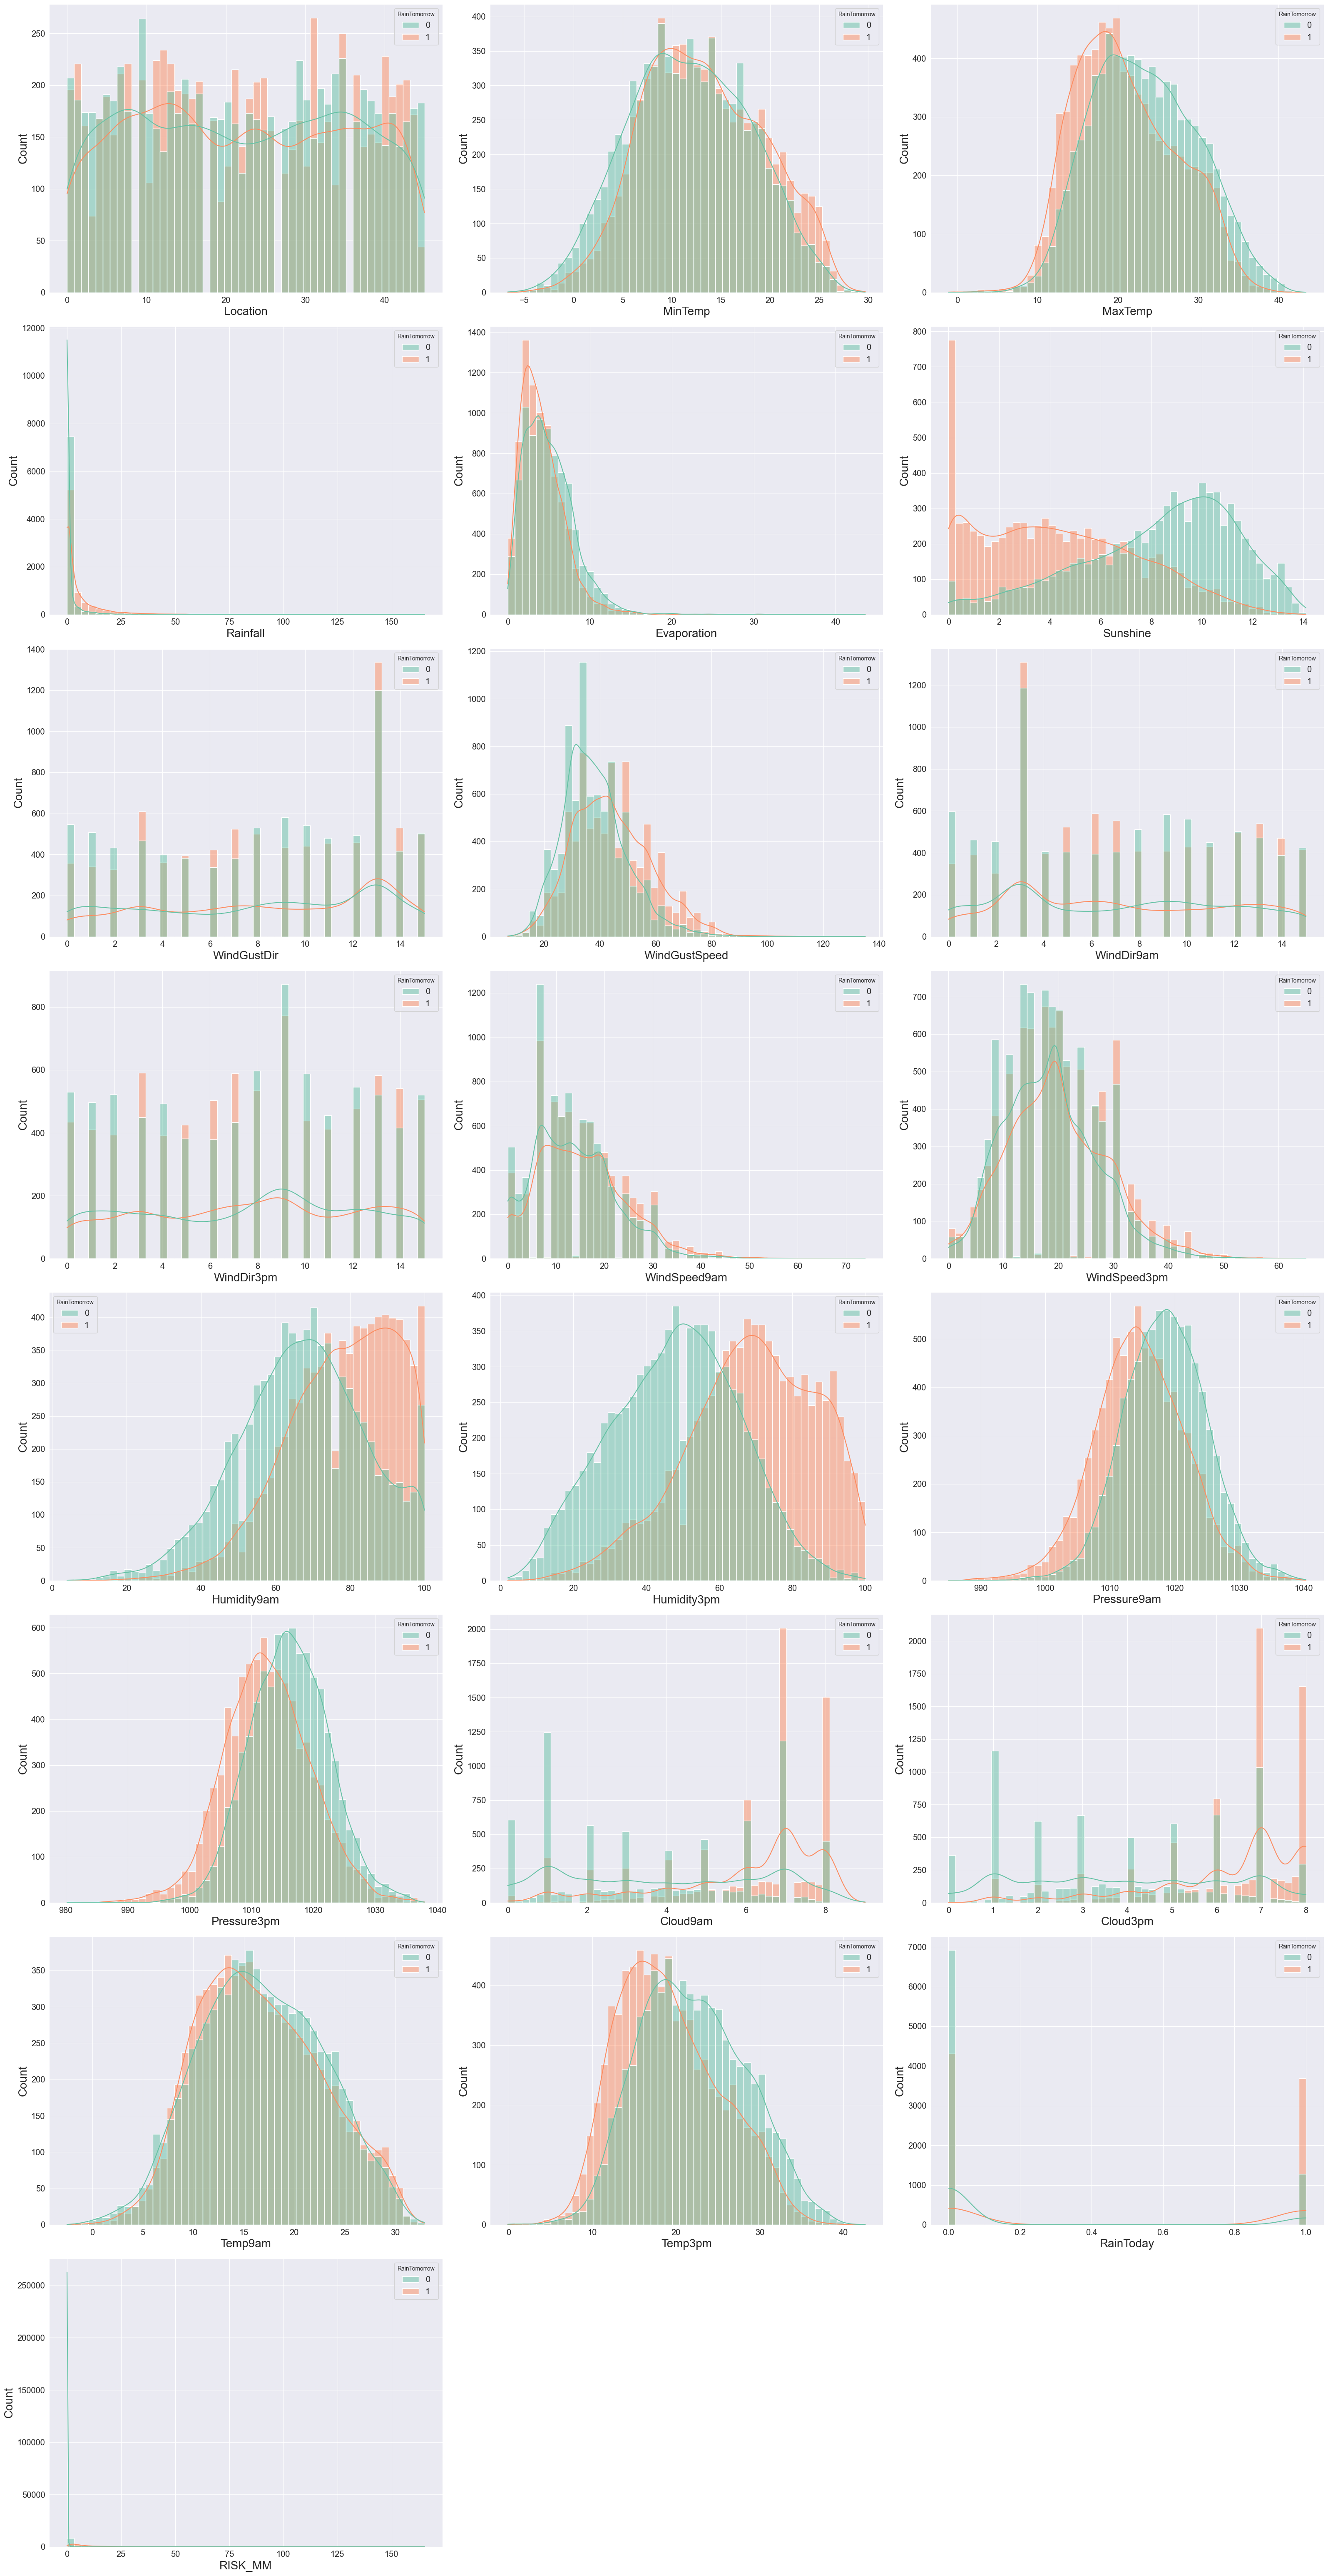

In [24]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(dataset, x=col, hue='RainTomorrow', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

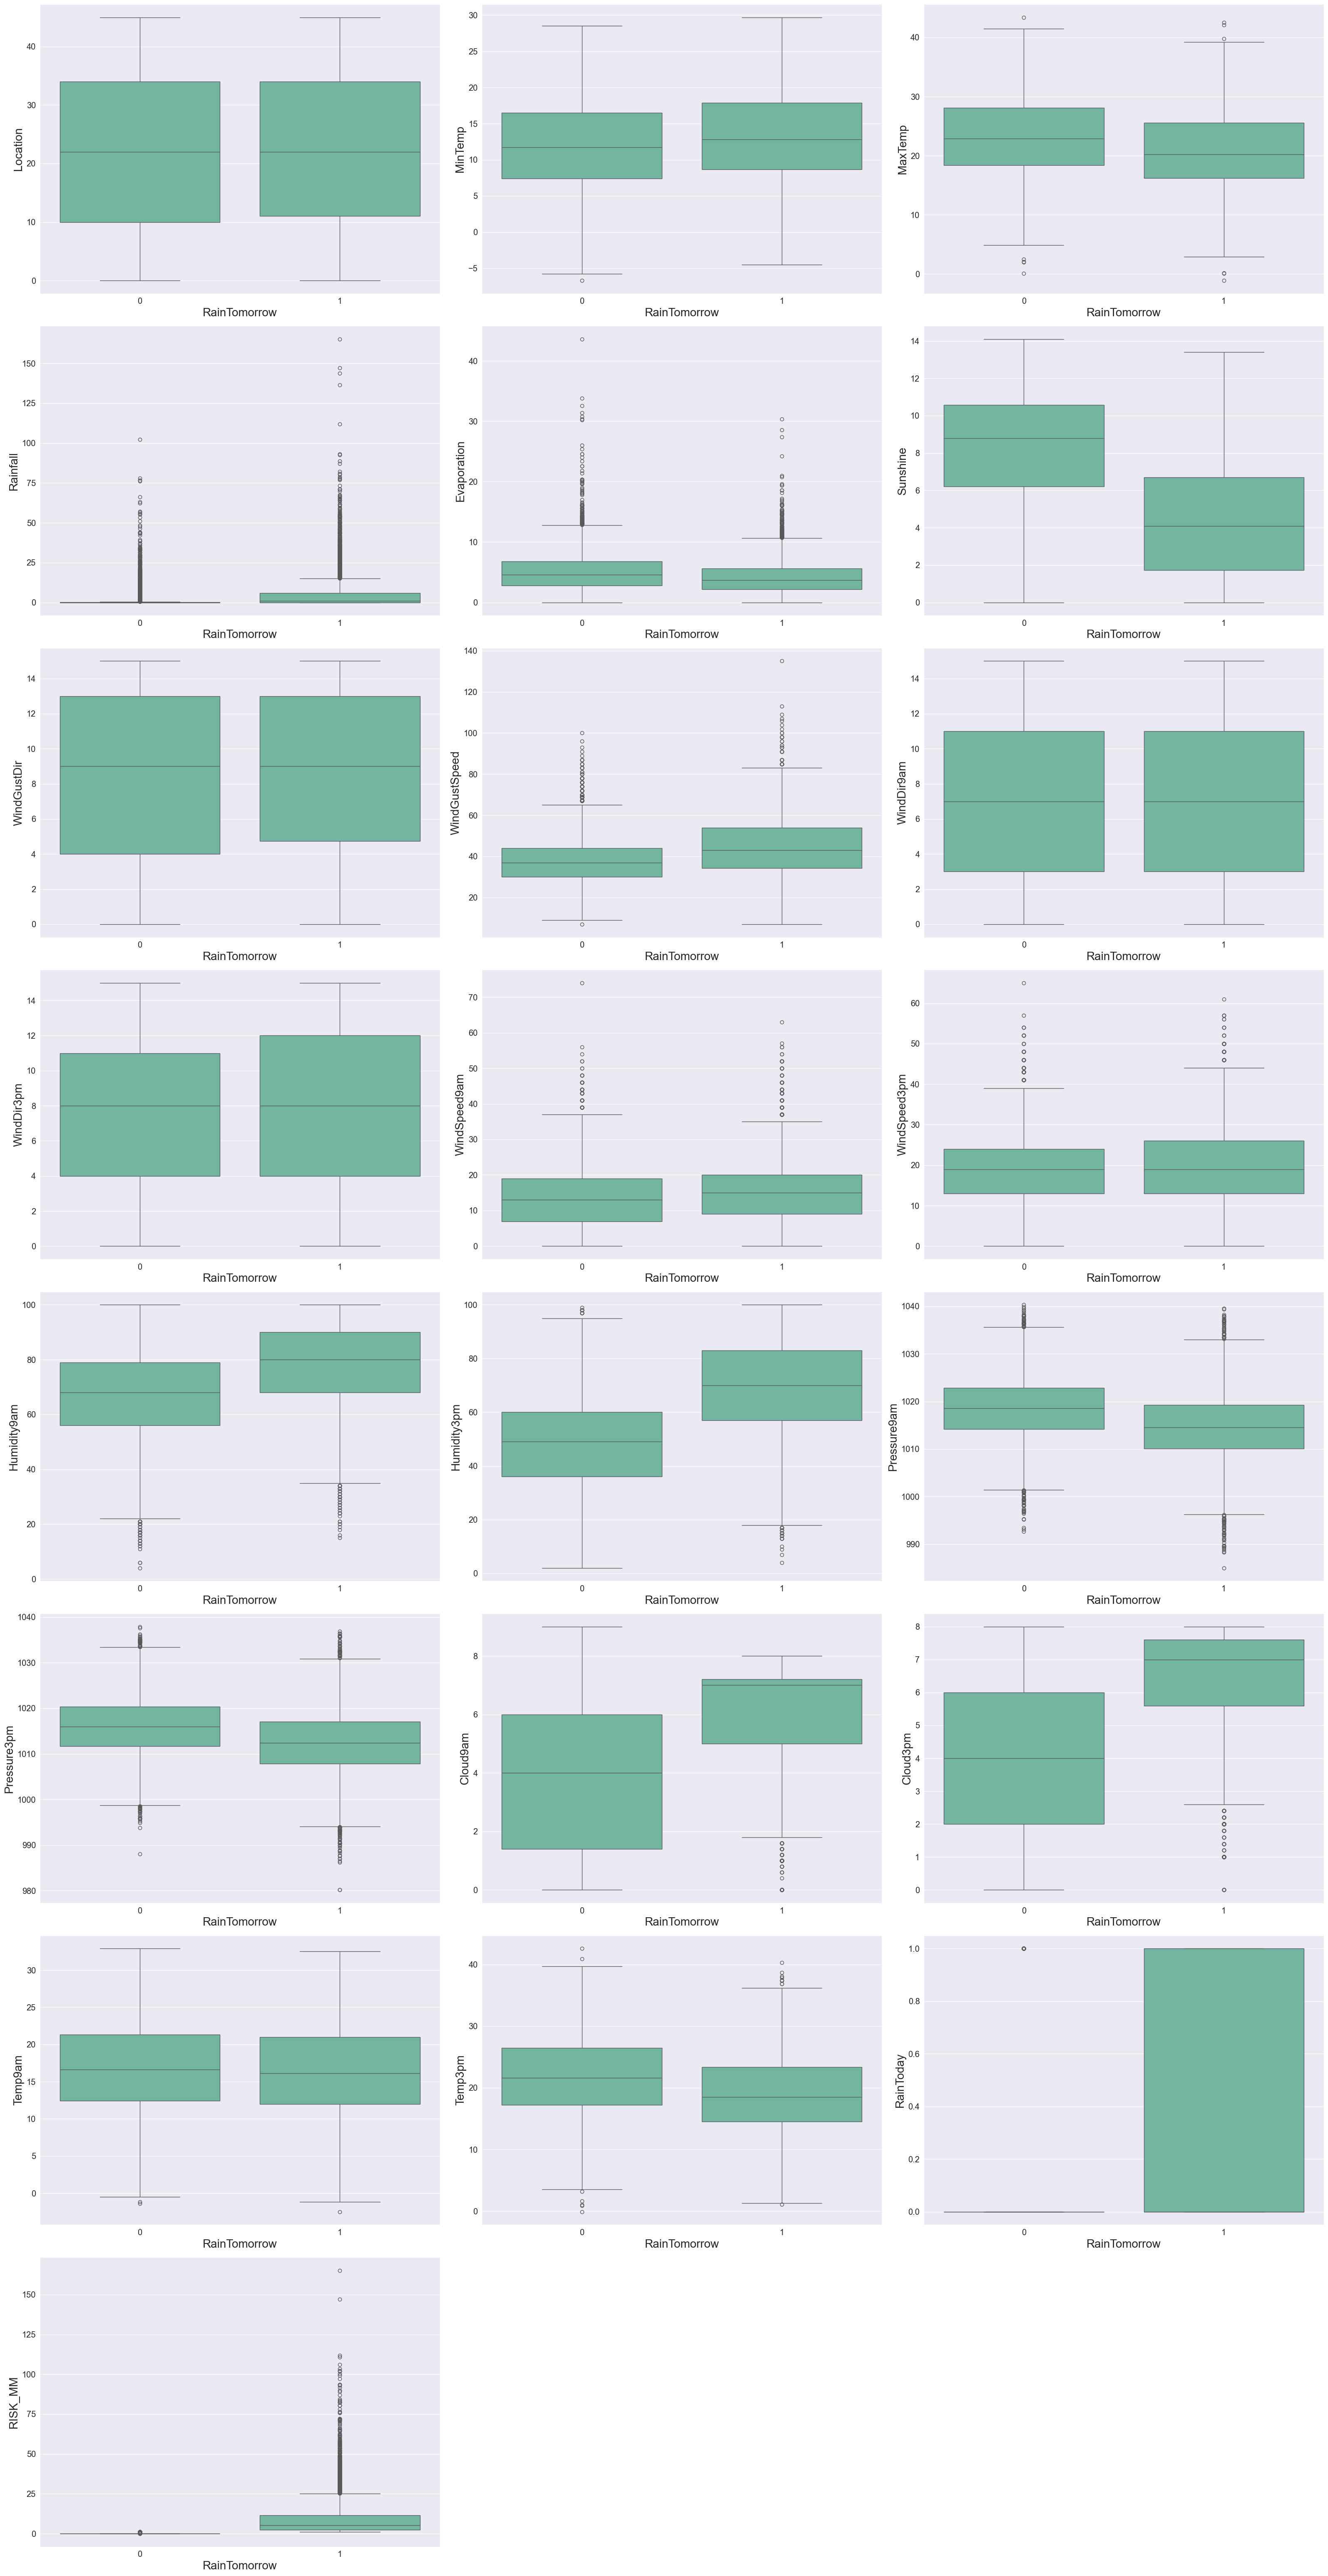

In [25]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=dataset, x='RainTomorrow', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('RainTomorrow', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

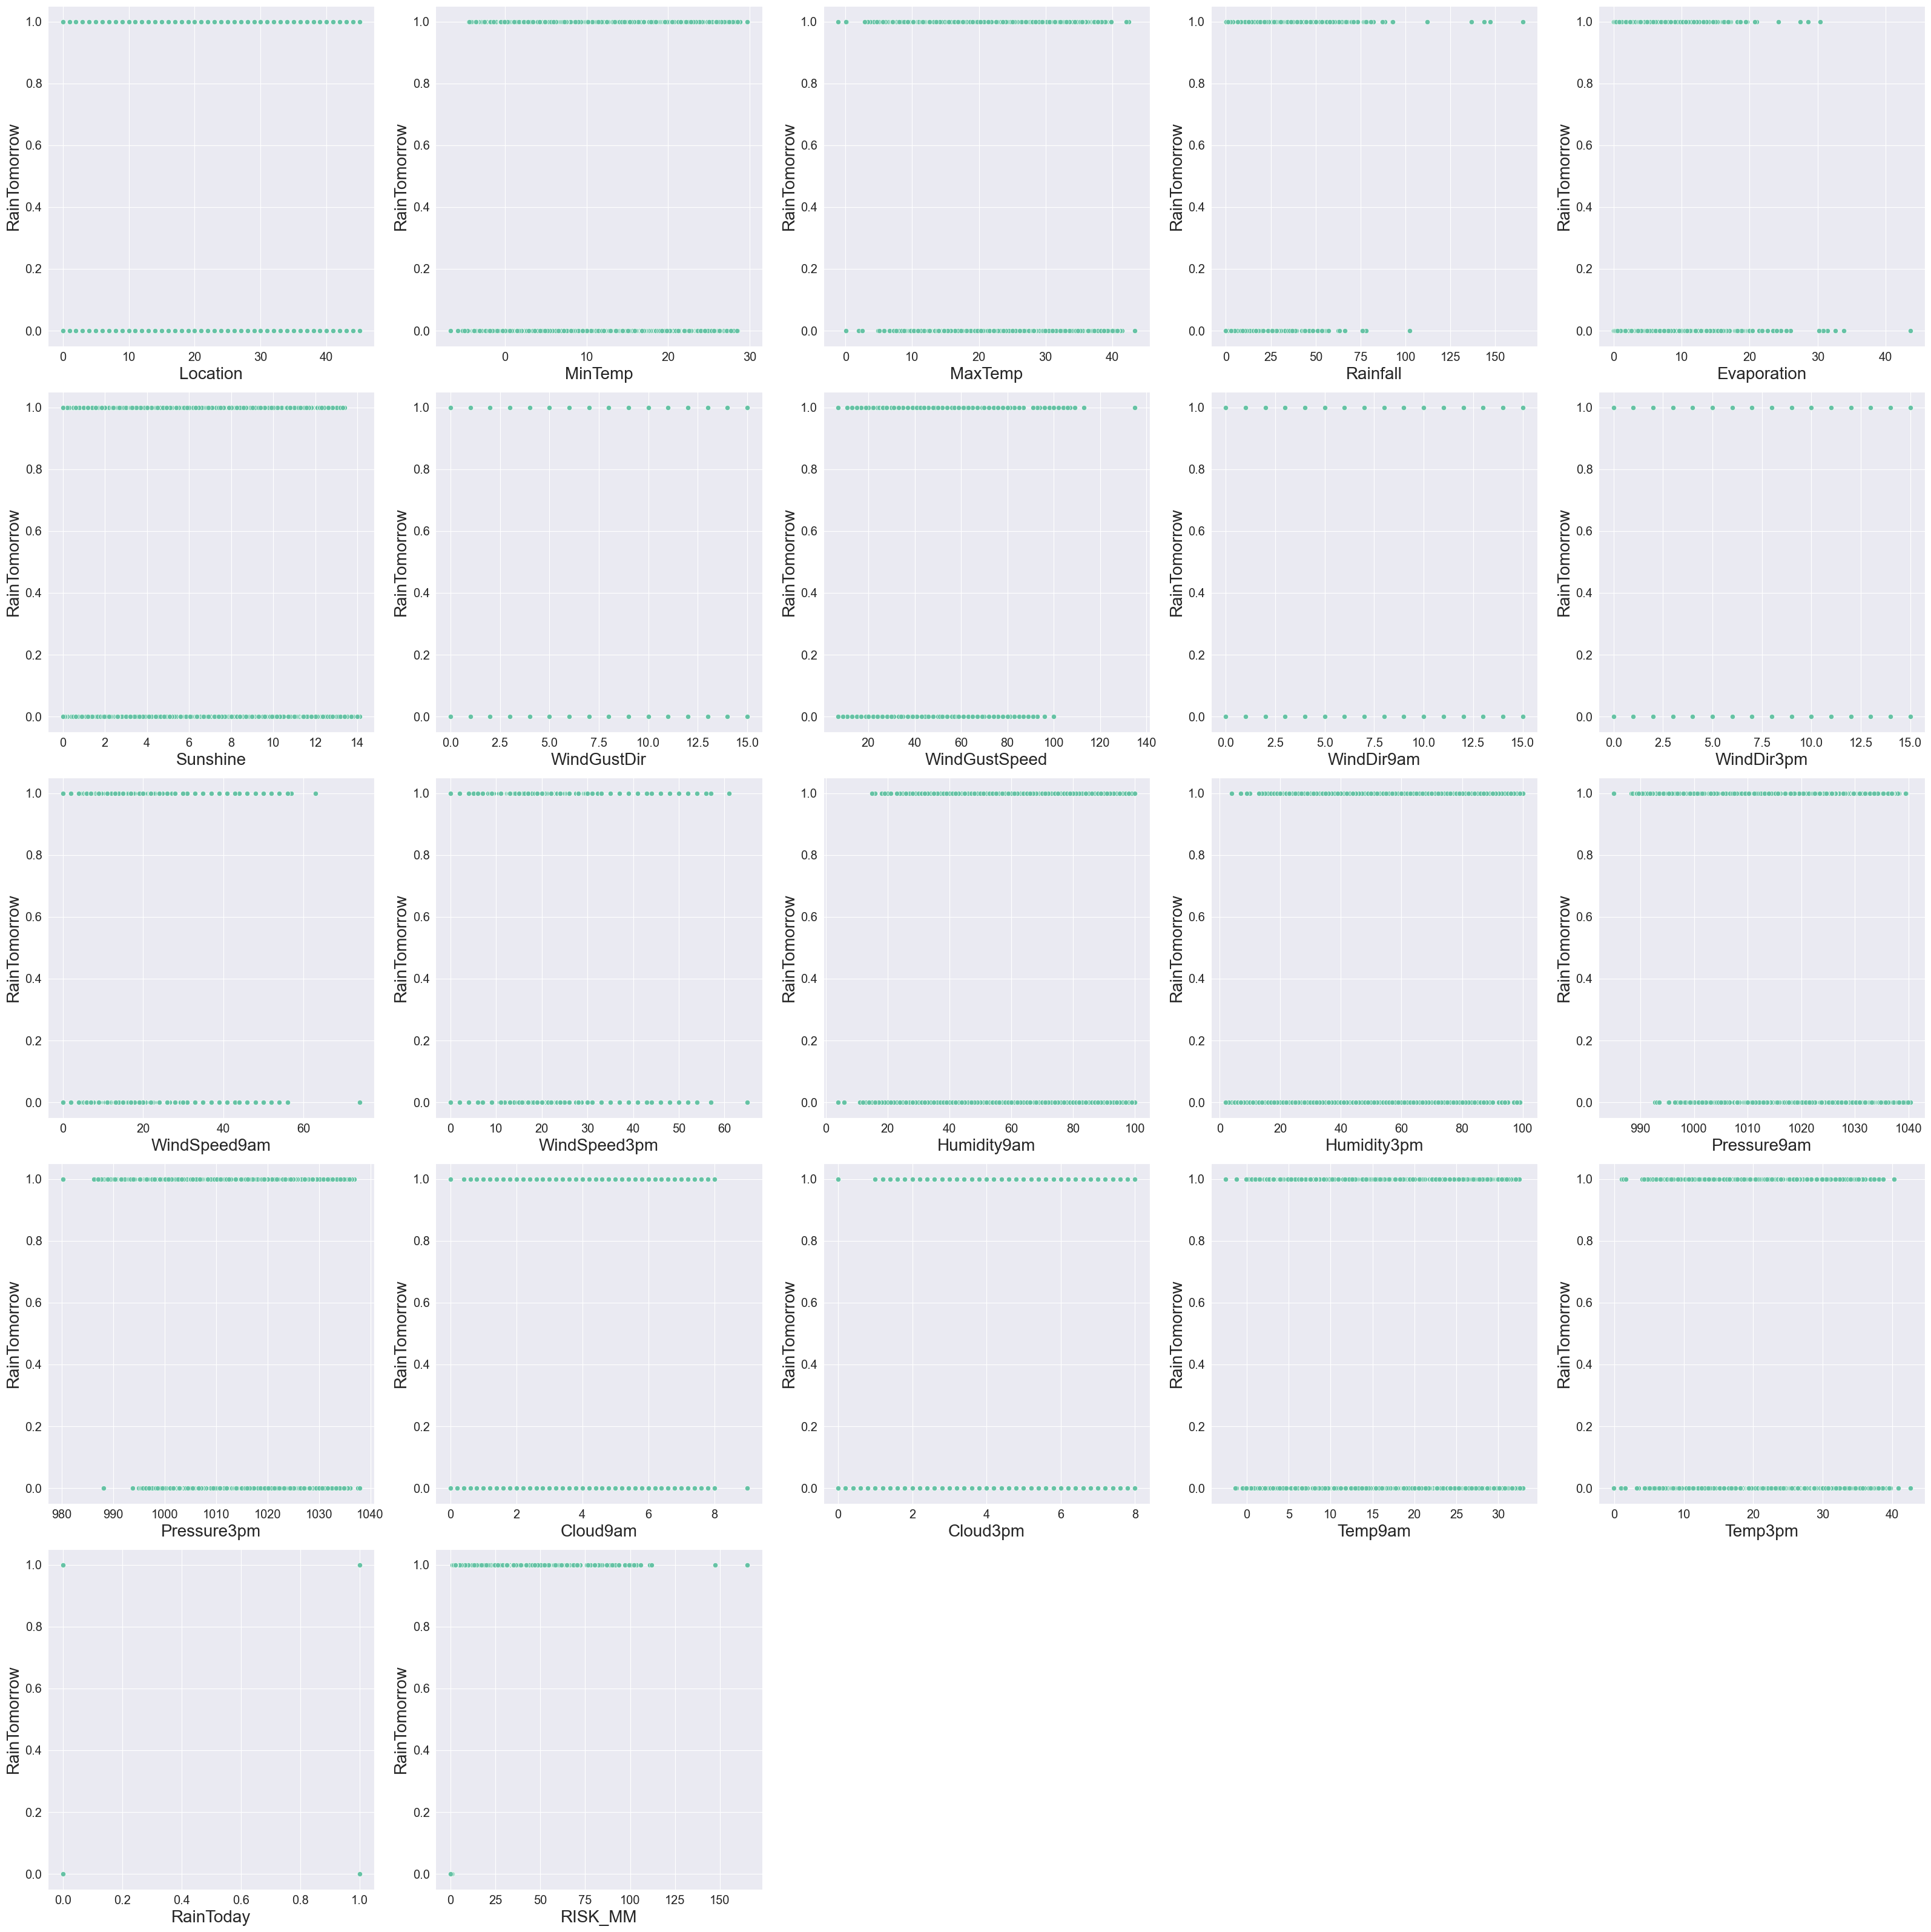

In [26]:
plt.figure(figsize=(32, 32))

num_cols = 5
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('RainTomorrow', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=dataset, x=col, y='RainTomorrow')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('RainTomorrow', fontsize=20)

plt.tight_layout()
plt.show()

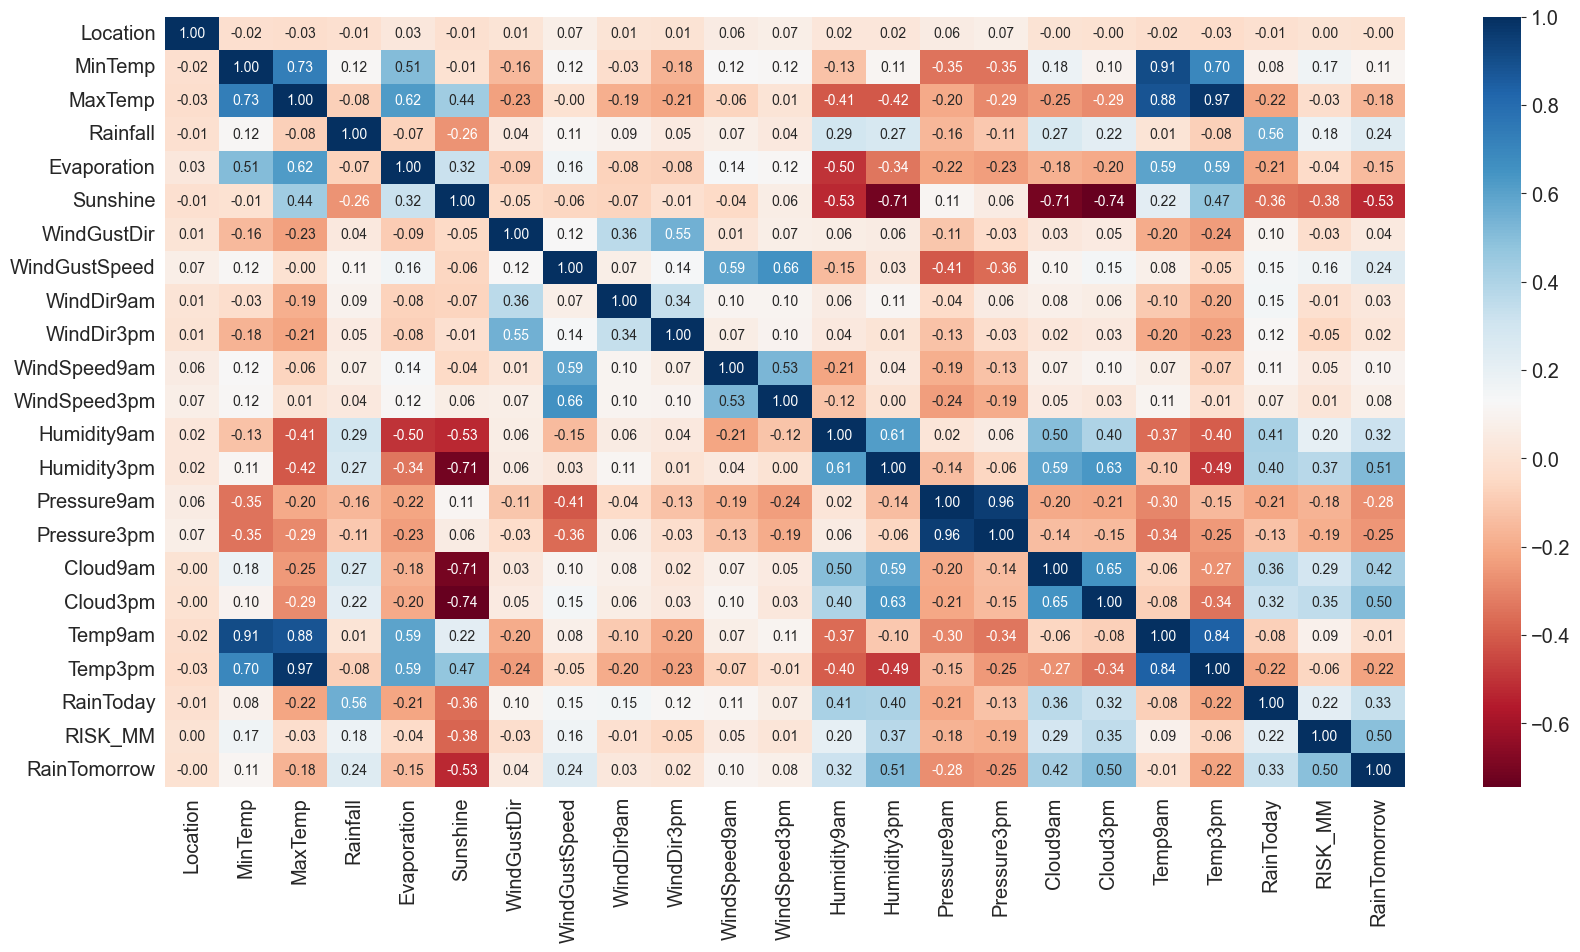

In [27]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.corr(), cmap='RdBu', annot=True, fmt=".2f");

**Q1.1. Build a classification model using Decision Trees to predict the target variable `RainTomorrow` from the dataset.**

In [28]:
# Getting independent and dependent variables 
y = dataset.RainTomorrow.values
X = dataset.drop(['RainTomorrow'], axis=1)

In [29]:
# Splitting the dataset into training and testing datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [30]:
X_train

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
6663          3     25.0     32.3       0.0        12.00      4.20   
4580         35      9.5     18.5       0.4         2.20      6.50   
4360         23     14.7     21.0      34.8         2.84      0.74   
3889         35     19.2     27.0       0.0        10.60      9.10   
7990         13     24.7     33.3       0.0         6.00     10.50   
...         ...      ...      ...       ...          ...       ...   
14129         0     16.6     32.4       0.0         6.80      8.60   
5672         30      4.3     17.7       1.2         2.80      8.50   
911           9      7.3     18.8       0.0         0.70      3.40   
16624         1     11.4     18.4       0.0         0.80      0.00   
7633         43     15.0     35.0       0.0         7.84     11.72   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
6663             7           63.0           6          15  ...         50.0   
4580            13           46.2          13          12  ...         64.0   
4360            13           44.8           3           3  ...         97.0   
3889            13           34.0           1           4  ...         65.0   
7990             6           39.0           8           6  ...         66.0   
...            ...            ...         ...         ...  ...          ...   
14129            6           48.0           4           6  ...         35.0   
5672            15           35.0           3          13  ...         66.0   
911              1           31.0           4           0  ...         65.0   
16624           13           24.8           3           0  ...         84.0   
7633            10           44.0           1          10  ...         39.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
6663          73.0      1005.60      1001.30       7.0       7.0     29.5   
4580          70.0      1014.70      1015.80       1.0       7.0     11.3   
4360          96.0      1008.62      1006.48       8.0       8.0     18.5   
3889          57.0      1013.80      1010.60       5.0       5.0     24.3   
7990          55.0      1010.00      1005.40       4.0       1.0     30.0   
...            ...          ...          ...       ...       ...      ...   
14129         20.0      1009.90      1006.20       2.2       2.4     24.1   
5672          51.0      1023.30      1022.20       5.0       3.0     12.3   
911           51.0      1024.30      1021.10       8.0       8.0     12.1   
16624         59.0      1031.90      1029.40       8.0       8.0     13.2   
7633          40.0      1016.20      1012.60       1.0       2.2     27.8   

       Temp3pm  RainToday  RISK_MM  
6663      27.6          0     14.4  
4580      15.2          0      4.2  
4360      19.8          1     30.7  
3889      26.1          0      6.6  
7990      32.3          0      7.2  
...        ...        ...      ...  
14129     31.2          0      0.0  
5672      16.7          1      1.0  
911       17.5          0      0.0  
16624     17.4          0      0.0  
7633      30.9          0      0.0  

[12153 rows x 22 columns]

In [31]:
X_test

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
15769         9     16.3     24.8       1.8         7.80      3.80   
16212        43      6.5     18.0       0.6         1.96      4.94   
3765         23     21.8     29.5       3.6         5.88      6.34   
4331         20     14.5     26.9       0.0         5.40      6.00   
8172         12      8.2     14.5       0.2         4.20      1.40   
...         ...      ...      ...       ...          ...       ...   
10753        16      8.3     22.8       0.0         7.00      7.34   
14815         7     10.6     23.5       0.0         2.80      9.50   
8831         35     18.0     21.2       0.4        10.20      2.40   
8360         33     15.3     21.9       0.0         9.20      7.70   
517          16      1.3     13.5       7.0         0.72      3.76   

       WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity9am  \
15769            8           50.0           6           3  ...         88.0   
16212            6           54.0           3           6  ...         99.0   
3765            13           28.2           4           9  ...         86.0   
4331             6           33.0           3           6  ...         60.0   
8172            10           39.0          15          10  ...         78.0   
...            ...            ...         ...         ...  ...          ...   
10753            9           65.0           9           5  ...         55.0   
14815           13           19.0          12          14  ...         79.0   
8831            13           43.4           8          10  ...         73.0   
8360            13           60.0          13          14  ...         54.0   
517              7           39.0          11           6  ...         98.0   

       Humidity3pm  Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  \
15769         56.0      1011.80      1008.40       7.0       7.0     17.5   
16212         70.0      1020.20      1018.10       5.8       5.2     13.3   
3765          67.0      1012.06      1009.16       7.0       6.0     23.6   
4331          46.0      1019.40      1015.20       7.0       5.0     17.6   
8172          75.0      1023.50      1023.80       4.4       6.0     11.5   
...            ...          ...          ...       ...       ...      ...   
10753         44.0      1014.00      1008.70       4.0       5.4     16.7   
14815         39.0      1022.50      1017.20       0.0       1.0     14.8   
8831          64.0      1021.90      1022.90       7.0       7.0     18.9   
8360          52.0      1007.60      1006.00       5.0       7.0     17.0   
517           71.0      1019.30      1016.20       3.6       6.2      4.8   

       Temp3pm  RainToday  RISK_MM  
15769     24.0          1      6.6  
16212     16.1          0     10.0  
3765      28.0          1      2.0  
4331      26.3          0      0.0  
8172      12.2          0      0.6  
...        ...        ...      ...  
10753     22.2          0     13.6  
14815     23.0          0      0.0  
8831      20.4          0      0.8  
8360      17.2          0      4.0  
517       13.0          1      3.4  

[4052 rows x 22 columns]

In [32]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5, 0.75, 'RISK_MM <= 1.1\ngini = 0.5\nsamples = 12153\nvalue = [6170, 5983]\nclass = Does Not Rain Tomorrow'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 6170\nvalue = [6170, 0]\nclass = Does Not Rain Tomorrow'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 5983\nvalue = [0, 5983]\nclass = Rain Tomorrow')]

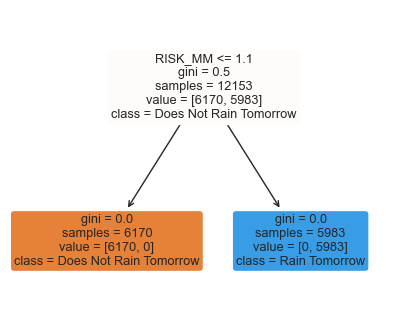

In [33]:
from sklearn.tree import plot_tree
plt.figure(figsize=(5, 4))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Does Not Rain Tomorrow", "Rain Tomorrow"], 
          feature_names=X.columns)

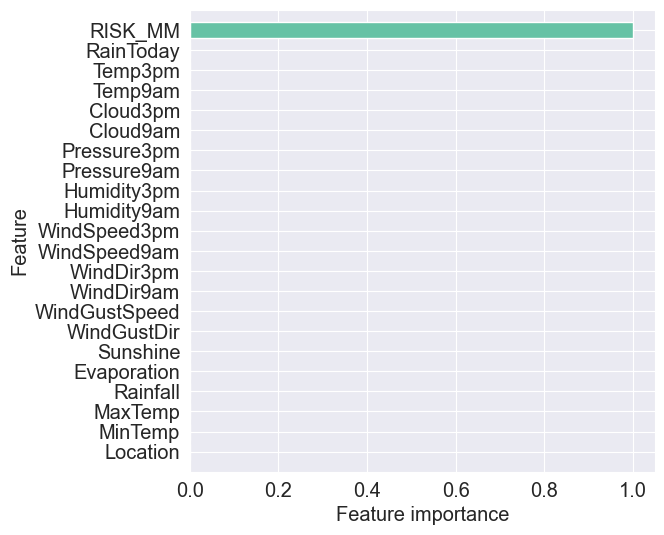

In [34]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(6, 6))
plot_feature_importances_(clf_dt)

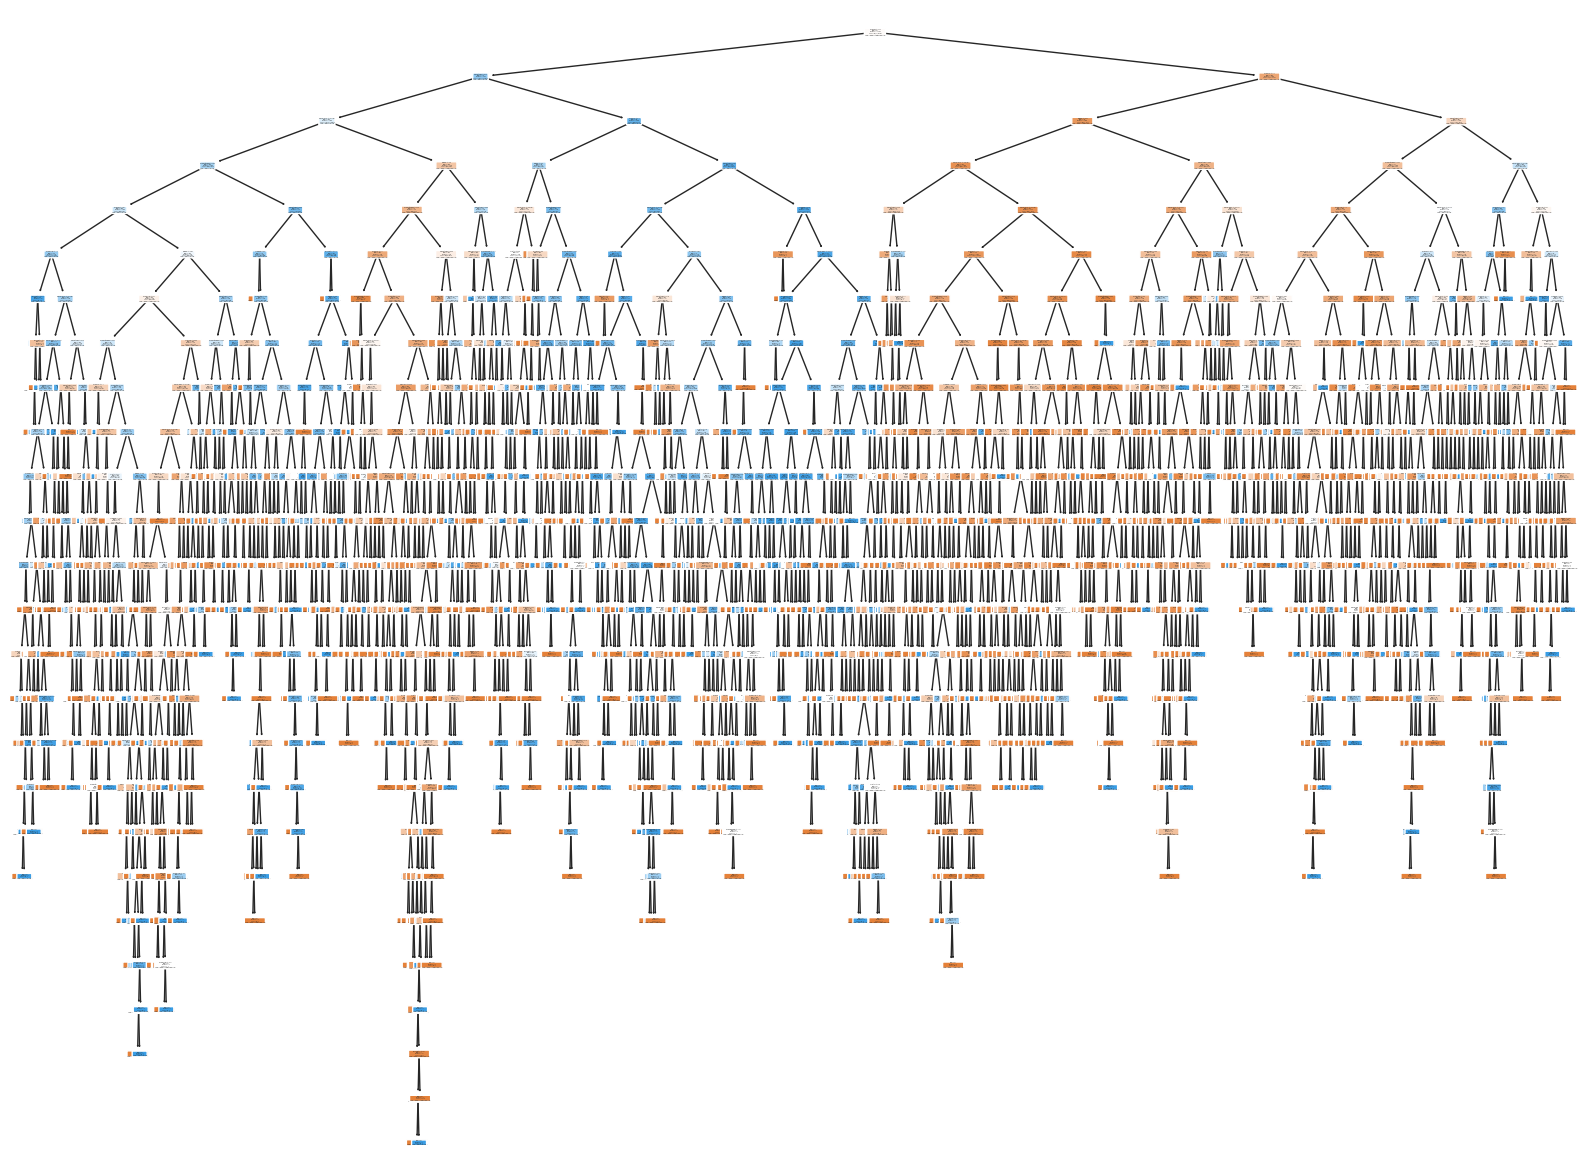

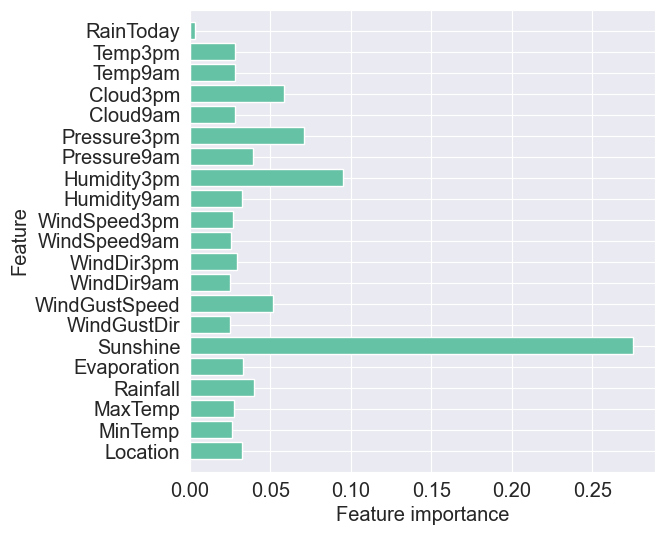

In [35]:
# This model seems to be overfitted as the feature 'RISK_MM' outnumbered its importance in comparison with other features
# Dropping the 'RISK_MM' feature and building the model again
dataset = dataset.drop(columns=['RISK_MM'])

y = dataset.RainTomorrow.values
X = dataset.drop(['RainTomorrow'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

plt.figure(figsize=(20, 15))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Does Not Rain Tomorrow", "Rain Tomorrow"], 
          feature_names=X.columns)

def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(6, 6))
plot_feature_importances_(clf_dt)

**Q1.2. Evaluate and discuss the model performance.**

In [36]:
y_pred = clf_dt.predict(X_test)

In [37]:
y_pred

array([0, 0, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
y_test

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [39]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.7063178677196447

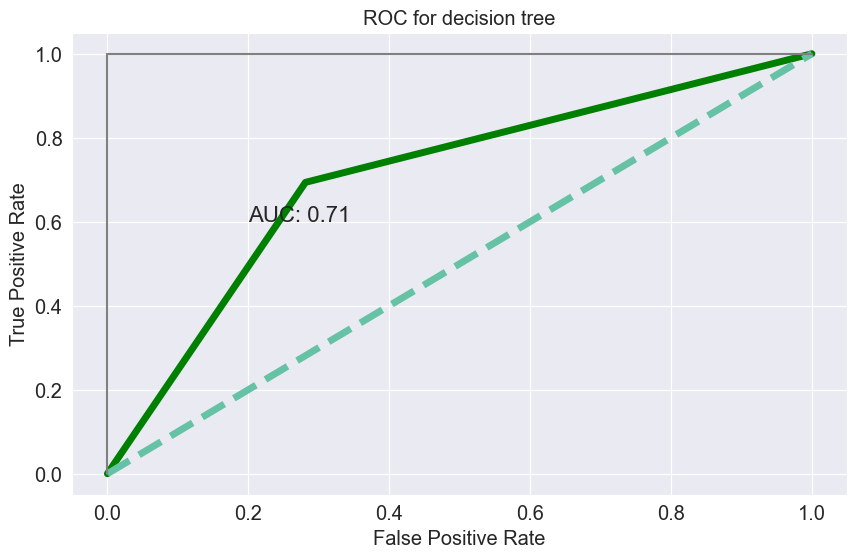

In [40]:
# ROC Curve
from sklearn.metrics import roc_auc_score,roc_curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [41]:
roc_auc_score(y_test, y_pred)

0.706286843875399

[[1460  571]
 [ 619 1402]]


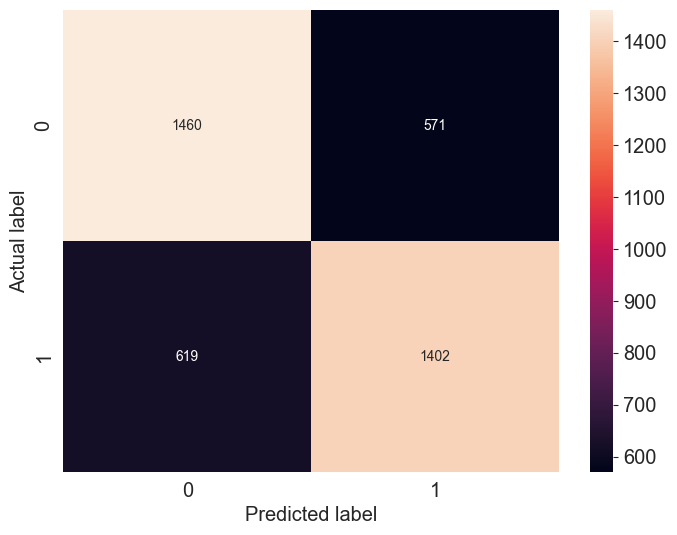

In [42]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      2031
           1       0.71      0.69      0.70      2021

    accuracy                           0.71      4052
   macro avg       0.71      0.71      0.71      4052
weighted avg       0.71      0.71      0.71      4052



**Answer:**

**Accuracy** - The accuracy of this model is 70.63%, which means that this model correctly predicts the chances of rain tomorrow at a 70.63% probability.

**Precision** - Precision measures the proportion of true positive predictions among all positive predictions.

> For the class 'No' of the dependent variable 'RainTomorrow', the precision is 70%, which indicates that 70% of the samples predicted as the class 'No' are actually class 'No.'

> For the class 'Yes' of the dependent variable 'RainTomorrow', the precision is 71%, which indicates that 71% of the samples predicted as the class 'Yes' are actually class 'Yes.'

**Recall** - Recall measures the proportion of true positive predictions among all actual positive samples.

> For the class 'No' of the dependent variable 'RainTomorrow', the recall is 72%, indicating that 72% of the actual class 'No' samples are correctly predicted as the class 'No'. 

> For the class 'Yes' of the dependent variable 'RainTomorrow', the recall is 69%, indicating that 69% of the actual class 'Yes' samples are correctly predicted as the class 'Yes'.

**F1-score** - The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall. For class 'No', the F1-score is 71%, and for class 'Yes', it is 70%.

**Confusion Matrix** - The confusion matrix provides a breakdown of the model's predictions for each class. It shows that the model correctly predicted 1460 samples of class 'No' and 1402 samples of class 'Yes'. However, it incorrectly classified 571 samples of class 'No' as class 'Yes' (false positives) and 619 samples of class 'Yes' as class 'No' (false negatives).

**ROC AUC Score** - The ROC AUC score measures the area under the receiver operating characteristic (ROC) curve. It provides an aggregate measure of the model's ability to discriminate between positive and negative samples. A score of 0.70 indicates that the model has moderate discriminatory power.

Overall, the decision tree model appears to perform reasonably well. It achieves a balanced performance in terms of precision, recall, and F1-score for both classes. However, there is room for improvement, particularly in reducing false positives and false negatives to enhance the model's performance further.

**Q1.3. Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting.**

In [44]:
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 

clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

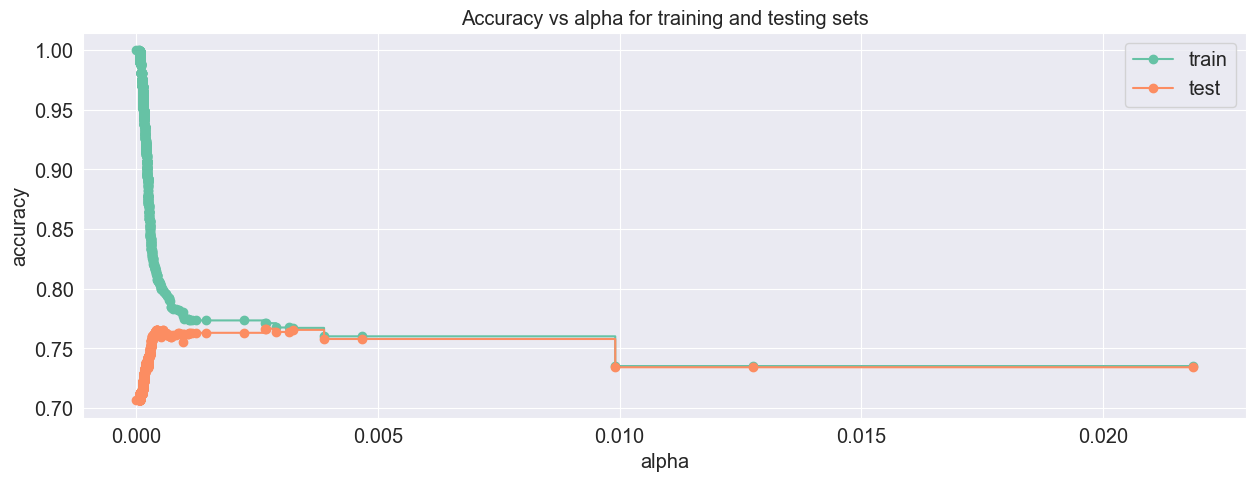

In [45]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

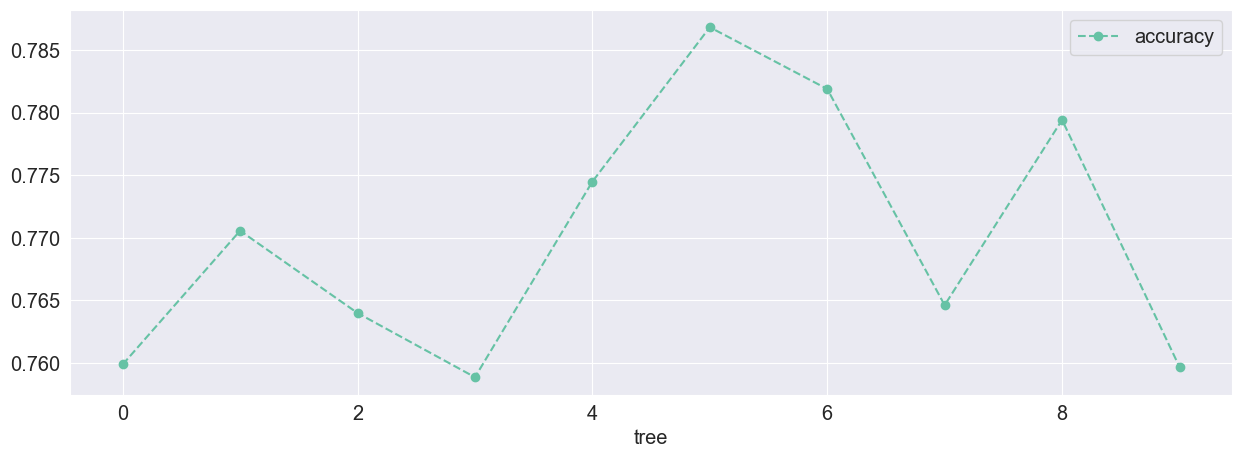

In [46]:
from sklearn.model_selection import cross_val_score
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.002/4)

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

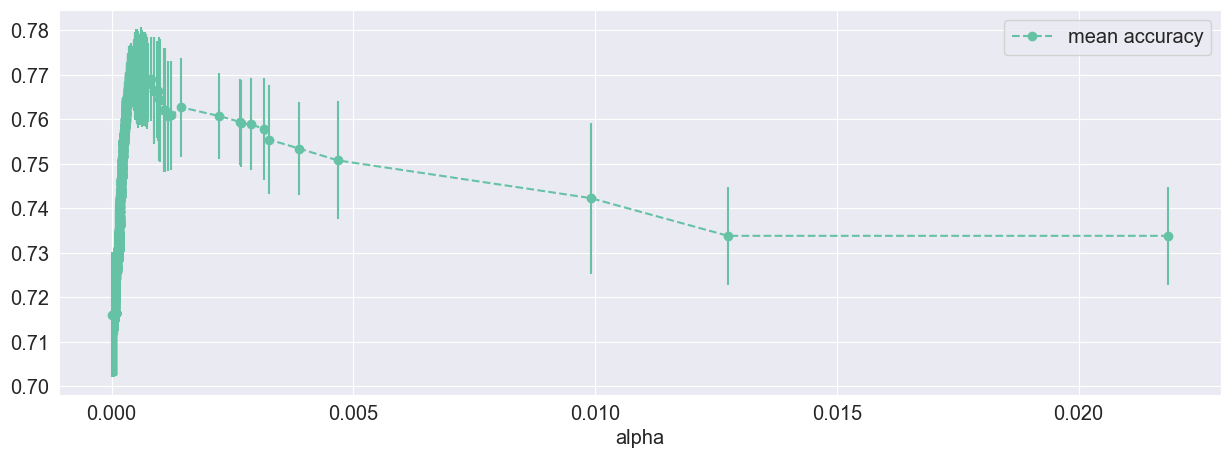

In [47]:
# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [48]:
alpha_results['mean accuracy'].max()

0.7705923760017327

In [49]:
alpha_results['mean accuracy'].idxmax()

830

In [50]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

0.0004584159757100269

In [51]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.5432098765432098, 0.95, 'Sunshine <= 7.19\ngini = 0.5\nsamples = 12153\nvalue = [6170, 5983]\nclass = Does Not Rain Tomorrow'),
 Text(0.30864197530864196, 0.85, 'Humidity3pm <= 67.4\ngini = 0.416\nsamples = 6727\nvalue = [1981.0, 4746.0]\nclass = Rain Tomorrow'),
 Text(0.18055555555555555, 0.75, 'Pressure3pm <= 1017.65\ngini = 0.495\nsamples = 2999\nvalue = [1353.0, 1646.0]\nclass = Rain Tomorrow'),
 Text(0.10802469135802469, 0.65, 'WindGustSpeed <= 49.3\ngini = 0.455\nsamples = 1980\nvalue = [692, 1288]\nclass = Rain Tomorrow'),
 Text(0.06790123456790123, 0.55, 'Sunshine <= 4.05\ngini = 0.488\nsamples = 1266\nvalue = [536, 730]\nclass = Rain Tomorrow'),
 Text(0.024691358024691357, 0.45, 'WindDir9am <= 1.5\ngini = 0.434\nsamples = 443\nvalue = [141, 302]\nclass = Rain Tomorrow'),
 Text(0.012345679012345678, 0.35, 'gini = 0.124\nsamples = 45\nvalue = [3, 42]\nclass = Rain Tomorrow'),
 Text(0.037037037037037035, 0.35, 'Pressure3pm <= 1013.55\ngini = 0.453\nsamples = 398\nvalue = 

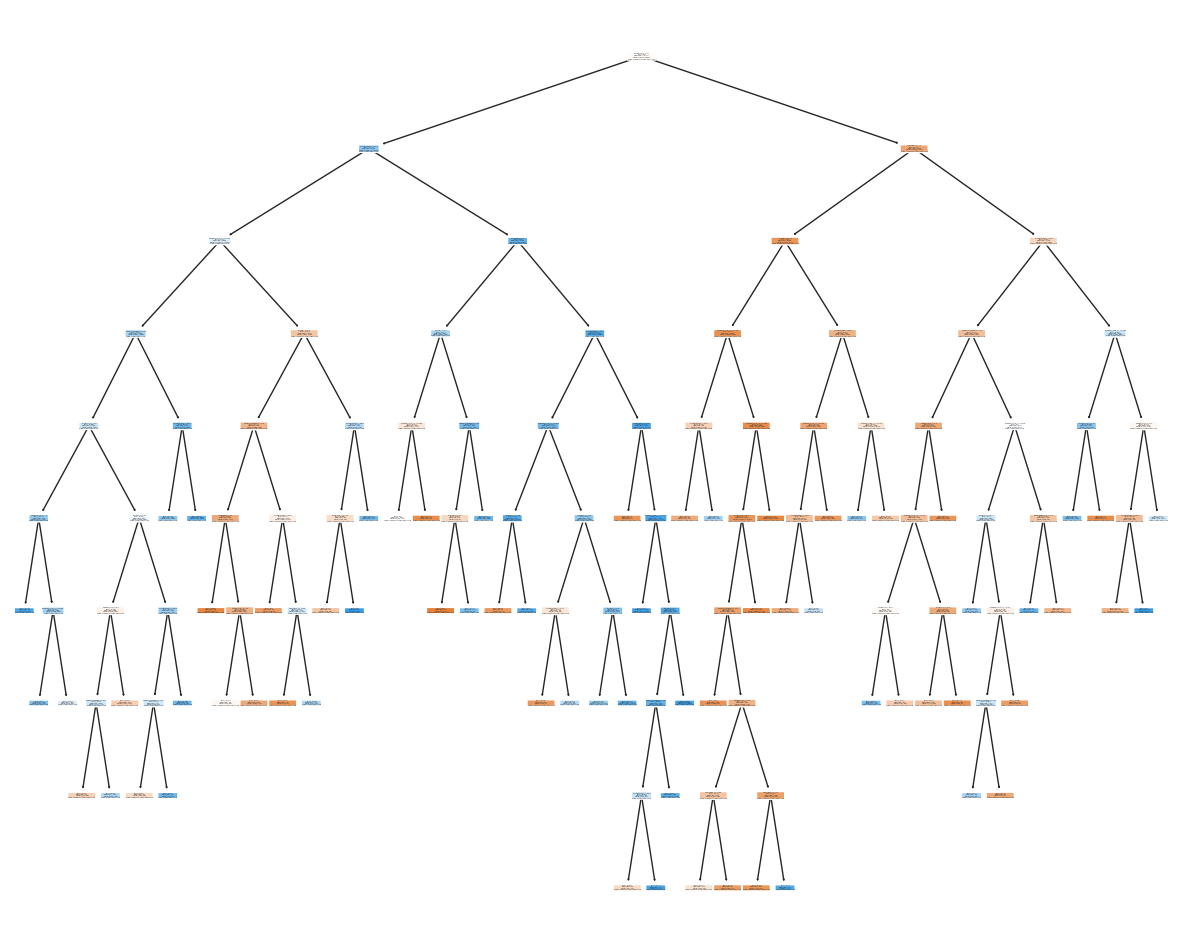

In [52]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=["Does Not Rain Tomorrow", "Rain Tomorrow"], 
          feature_names=X.columns)

**Q1.4. Evaluate and discuss the model performance after the pruning.**

In [53]:
y_pred = clf_dt.predict(X_test)

In [54]:
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [55]:
y_test

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [56]:
accuracy_score(y_pred, y_test)

0.7620927936821322

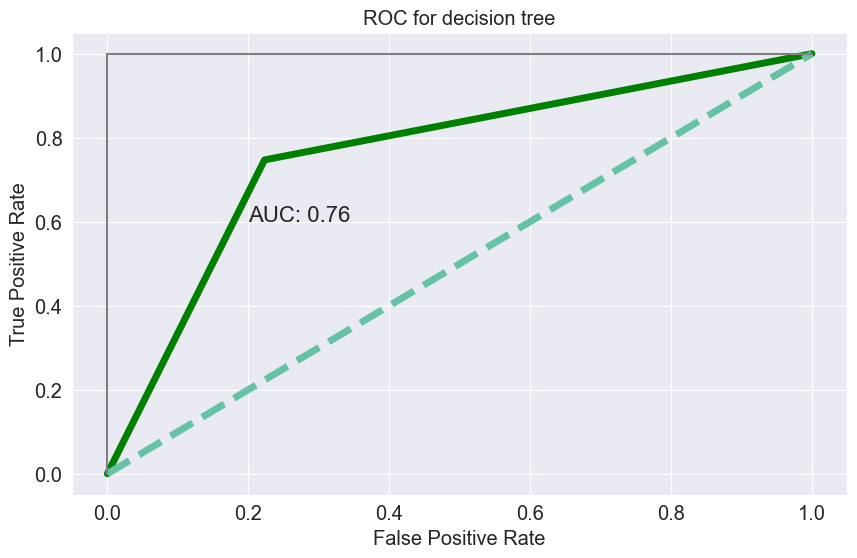

In [57]:
# ROC Curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [58]:
roc_auc_score(y_test, y_pred)

0.76205601889174

[[1578  453]
 [ 511 1510]]


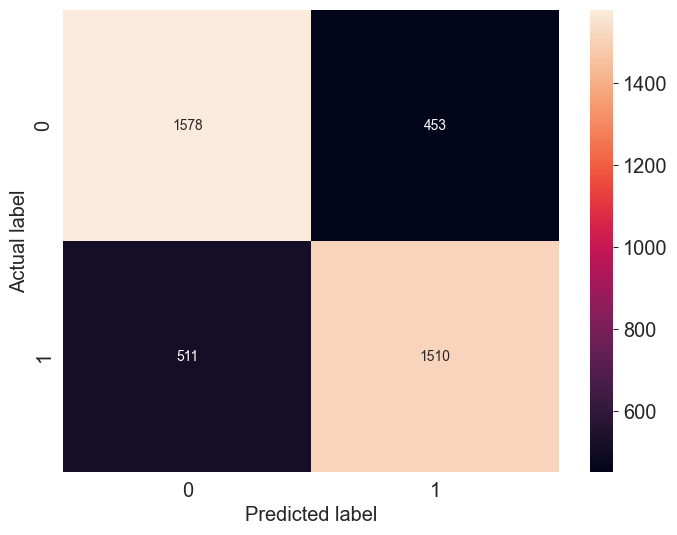

In [59]:
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      2031
           1       0.77      0.75      0.76      2021

    accuracy                           0.76      4052
   macro avg       0.76      0.76      0.76      4052
weighted avg       0.76      0.76      0.76      4052



**Answer:**

**Accuracy** - The accuracy of the pruned model is 76.20%, which means that this model correctly predicts the chances of rain tomorrow at a 76.20% probability, whereas the prior model had an accuracy of 70.63%.

**Precision** - Precision measures the proportion of true positive predictions among all positive predictions.

> For the class 'No' of the dependent variable 'RainTomorrow', the precision is 76%, which indicates that 76% of the samples predicted as the class 'No' are actually class 'No,' whereas the prior model had a precision of 70% for the class 'No'.

> For the class 'Yes' of the dependent variable 'RainTomorrow', the precision is 77%, which indicates that 77% of the samples predicted as the class 'Yes' are actually class 'Yes,' whereas the prior model had a precision of 71% for the class 'Yes'.

**Recall** - Recall measures the proportion of true positive predictions among all actual positive samples.

> For the class 'No' of the dependent variable 'RainTomorrow', the recall is 78%, indicating that 78% of the actual class 'No' samples are correctly predicted as the class 'No,' whereas the prior model had a recall of 72% for the class 'No'.

> For the class 'Yes' of the dependent variable 'RainTomorrow', the recall is 75%, indicating that 75% of the actual class 'Yes' samples are correctly predicted as the class 'Yes,' whereas the prior model had a recall of 69% for the class 'No'.

**F1-score** - The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall. For class 'No', the F1-score is 77%, and for class 'Yes', it is 76%, whereas the prior model had an F1-score of 71% and 70% for the class 'No' and 'Yes' respectively.

**Confusion Matrix** - The confusion matrix provides a breakdown of the model's predictions for each class. It shows that the pruned model correctly predicted 1578 samples of class 'No' and 1510 samples of class 'Yes'. However, it incorrectly classified 453 samples of class 'No' as class 'Yes' (false positives) and 511 samples of class 'Yes' as class 'No' (false negatives).

The number of True Negatives and True Positives is more in comparison with the prior model whereas the number of False Positives and False Negatives is lower as compared with the prior model. This indicates that our pruned model is better than our initial model.

**ROC AUC Score** - The ROC AUC score measures the area under the receiver operating characteristic (ROC) curve. It provides an aggregate measure of the model's ability to discriminate between positive and negative samples. A score of 0.76 for the pruned model indicates that the model has good discriminatory power.

Overall, the pruned model demonstrates improved performance compared to the previous model. It achieves a balanced performance in terms of precision, recall, and F1-score for both classes. The accuracy score and ROC AUC score also indicate good overall performance.

**Q1.5. Build a classification model using Random Forests to predict the target variable `RainTomorrow` from the dataset.**

In [61]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

**Q1.6. Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).**

In [62]:
y_pred = clf_rf.predict(X_test)

In [63]:
y_pred

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [64]:
y_test

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [65]:
accuracy_score(y_pred, y_test)

0.7875123395853899

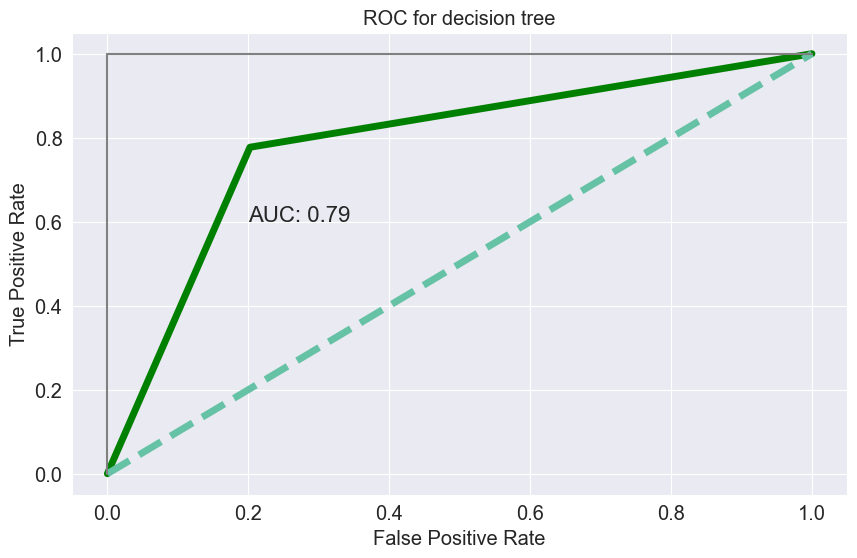

In [66]:
# ROC Curve
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test,y_pred)
plt.figure(figsize=(10,6))
plt.title('ROC for decision tree')
plt.plot(false_positive_rate, true_positive_rate, linewidth=5, color='green')
plt.plot([0,1],ls='--',linewidth=5)
plt.plot([0,0],[1,0],c='.5')
plt.plot([1,1],c='.5')
plt.text(0.2,0.6,'AUC: {:.2f}'.format(roc_auc_score(y_test,y_pred)),size= 16)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

In [67]:
roc_auc_score(y_test, y_pred)

0.7874872918550201

[[1620  411]
 [ 450 1571]]


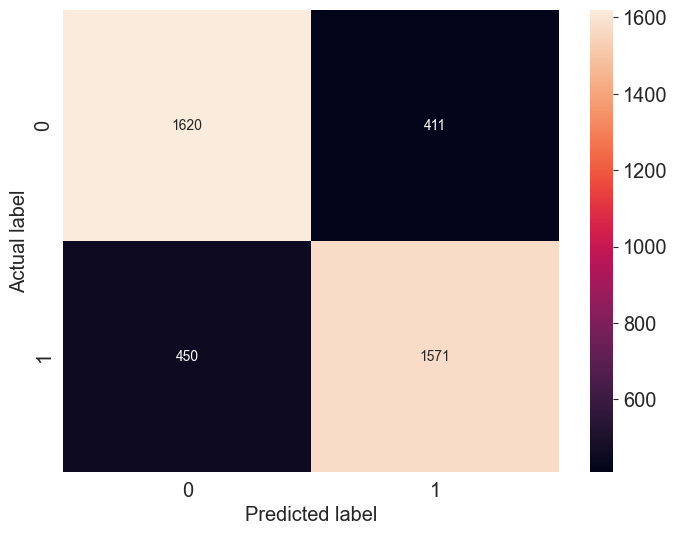

In [68]:
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [69]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79      2031
           1       0.79      0.78      0.78      2021

    accuracy                           0.79      4052
   macro avg       0.79      0.79      0.79      4052
weighted avg       0.79      0.79      0.79      4052



**Answer:**

**Accuracy** - The accuracy of our Random Forests model is 78.75%, which means that this model correctly predicts the chances of rain tomorrow at a 78.75% probability, whereas the prior Decision Trees models had less accuracy of 70.63% and 76.20%.

**Precision** - Precision measures the proportion of true positive predictions among all positive predictions.

> For the class 'No' of the dependent variable 'RainTomorrow', the precision is 78%, which indicates that 78% of the samples predicted as the class 'No' are actually class 'No,' whereas the prior Decision Trees models had less precision of 70% and 76% for the class 'No'.

> For the class 'Yes' of the dependent variable 'RainTomorrow', the precision is 79%, which indicates that 79% of the samples predicted as the class 'Yes' are actually class 'Yes,' whereas the prior Decision Trees models had less precision of 71% and 77% for the class 'Yes'.

**Recall** - Recall measures the proportion of true positive predictions among all actual positive samples.

> For the class 'No' of the dependent variable 'RainTomorrow', the recall is 80%, indicating that 80% of the actual class 'No' samples are correctly predicted as the class 'No,' whereas the prior Decision Trees models had less recall of 72% and 78% for the class 'No'.

> For the class 'Yes' of the dependent variable 'RainTomorrow', the recall is 78%, indicating that 78% of the actual class 'Yes' samples are correctly predicted as the class 'Yes,' whereas the prior Decision Trees models had less recall of 69% and 75% for the class 'No'.

**F1-score** - The F1-score is the harmonic mean of precision and recall. It provides a balanced measure between precision and recall. For class 'No', the F1-score is 79%, and for class 'Yes', it is 78%, whereas the prior Decision Trees models had less F1-score of 71% & 77% for the class 'No', and 70% & 76% for the class 'Yes.'

**Confusion Matrix** - The confusion matrix provides a breakdown of the model's predictions for each class. It shows that the Random Forests model correctly predicted 1620 samples of class 'No' and 1571 samples of class 'Yes' which is higher than both previous Decision Trees models. Our Random Forests model incorrectly classified 411 samples of class 'No' as class 'Yes' (false positives) and 450 samples of class 'Yes' as class 'No' (false negatives) which is less than both previous Decision Trees models.

The number of True Negatives and True Positives is more in comparison with the prior models whereas the number of False Positives and False Negatives is lower as compared with the prior models. This indicates that our Random Forests model is better than our prior Decision Trees models.

**ROC AUC Score** - The ROC AUC score measures the area under the receiver operating characteristic (ROC) curve. It provides an aggregate measure of the model's ability to discriminate between positive and negative samples. A score of 0.78 for the Random Forests model indicates that the model has good discriminatory power.

Overall, the Random Forests model demonstrates improved performance compared to the previous models. It achieves a high ROC AUC score, indicating good discriminative power, and a high accuracy score. The confusion matrix also reflects fewer false positives and false negatives compared to true positives and true negatives, suggesting good classification accuracy. The precision, recall, and F1-score for both classes are also balanced, indicating that the model performs well across both classes.

**Q1.7. Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab.**

**Answer:** The accuracy of our logistic regression model from Lab 2 was 91.82%, whereas the accuracy of our pruned Decision Trees model is 76.20% and the accuracy of our Random Forests model is 78.75%.

Similarly, all other performance metrics (Precision, Recall for the 'No' class, F1-score, Confusion Matrix, and ROC AUC Score) for our logistic regression model from Lab 2 seem to be better than our pruned Decision Trees model and Random Forests model, except for the Recall for the 'Yes' class. The Recall for the 'Yes' class of the dependent variable 'RainTomorrow' indicates the percentage of the actual class 'Yes' samples that are correctly predicted as the class 'Yes'. Here, the Recall for the 'Yes' class is 78% in the random forest, 75% in the pruned decision tree, and 66% in the logistic regression model from Lab 2.

The performance metrics can be visualized using the following table:
| Performance Metrics | Logistic Regression | Pruned Decision Trees | Random Forests |
|----------|----------|----------|----------|
| Accuracy | 91.82% | 76.20% | 78.75% |
| Precision for 'Yes' class | 98% | 77% | 79% |
| Precision for 'No' class | 91% | 76% | 78% |
| Recall for 'Yes' class | **66%** | **75%** | **78%** |
| Recall for 'No' class | 100% | 78% | 80% |
| F1-score for 'Yes' class | 78% | 76% | 78% |
| F1-score for 'No' class | 95% | 77% | 79% |
| ROC AUC Score | 0.82 | 0.76 | 0.78 |

**Q1.8. Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?**

**Answer:** Comparing the decision tree with the random forest, the random forest seems to be better in all the performance metrics (Accuracy, Precision, Recall, F1-score, Confusion Matrix, and ROC AUC Score). Similarly, comparing the logistic regression with the random forest, the logistic regression seems to be better than the random forest in all the performance metrics except for the Recall for the 'Yes' class.

Here, the class 'Yes' seems to be more important than the class 'No' for the dependent feature 'RainTomorrow' as we want to know the day when there will be rain. In other words, we are more concerned with predicting that there will be rain tomorrow rather than predicting that there will be no rain tomorrow. Therefore, Recall for the 'Yes' class seems to have higher importance, and thus our Random Forest model is perfect out of these three models (logistic regression, decision tree, and random forest).

Moreover, the performance metrics of logistic regression could be high due to overfitting of data too.

# Question 2: Multi-Class Classification Using Decision Trees and Random Forests
<hr style="border:1px solid orange"> </hr>

#### Read the content of the `penguins.csv` file and perform the following: (Note: You should use your previous work from lab 2 to preprocess and visualize the dataset before building the models)

> **Q2.1.** Build a classification model using Decision Trees to predict the target variable `species` from the dataset.

> **Q2.2.** Evaluate and discuss the model performance.

> **Q2.3.** Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting. 

> **Q2.4.** Evaluate and discuss the model performance after the pruning.

> **Q2.5.** Build a classification model using Random Forests to predict the target variable `species` from the dataset.

> **Q2.6.** Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).

> **Q2.7.** Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab. 

> **Q2.8.** Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?

**Q2. Preprocessing and visualizing the dataset**

In [70]:
dataset = pd.read_csv('penguins.csv')
dataset.shape

(344, 7)

In [71]:
dataset.head(10)

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   
5  Adelie  Torgersen            39.3           20.6              190.0   
6  Adelie  Torgersen            38.9           17.8              181.0   
7  Adelie  Torgersen            39.2           19.6              195.0   
8  Adelie  Torgersen            34.1           18.1              193.0   
9  Adelie  Torgersen            42.0           20.2              190.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  
5       3650.0    MALE  
6       3625.0  FEMALE  
7       4675.0    MALE  
8       3475.0     NaN  
9       4250.0     NaN

In [72]:
dataset.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [73]:
dataset.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [74]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [75]:
numberOfRowsWithMissingValues = dataset.isnull().any(axis=1).sum()
numberOfRowsWithMissingValues

11

In [76]:
dataset = dataset.dropna()

In [77]:
dataset.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [78]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   bill_length_mm     333 non-null    float64
 3   bill_depth_mm      333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB



Unique values for species column: ['Adelie' 'Chinstrap' 'Gentoo']

Unique values for island column: ['Torgersen' 'Biscoe' 'Dream']


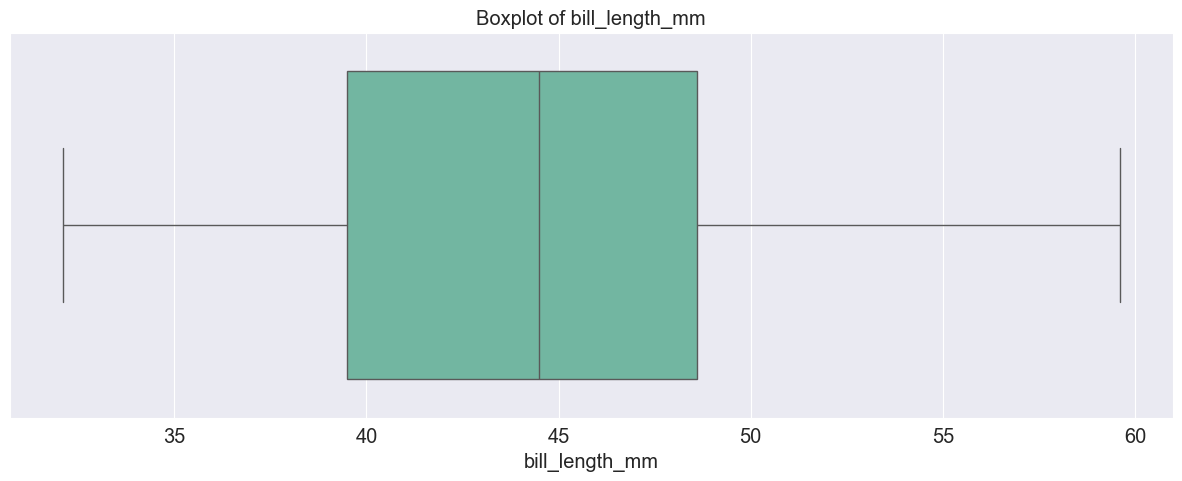

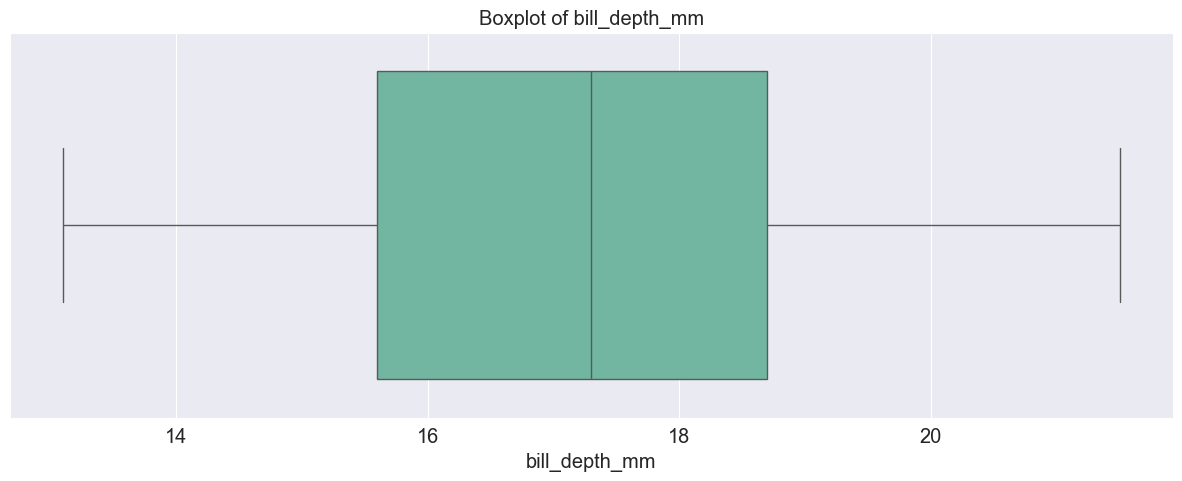

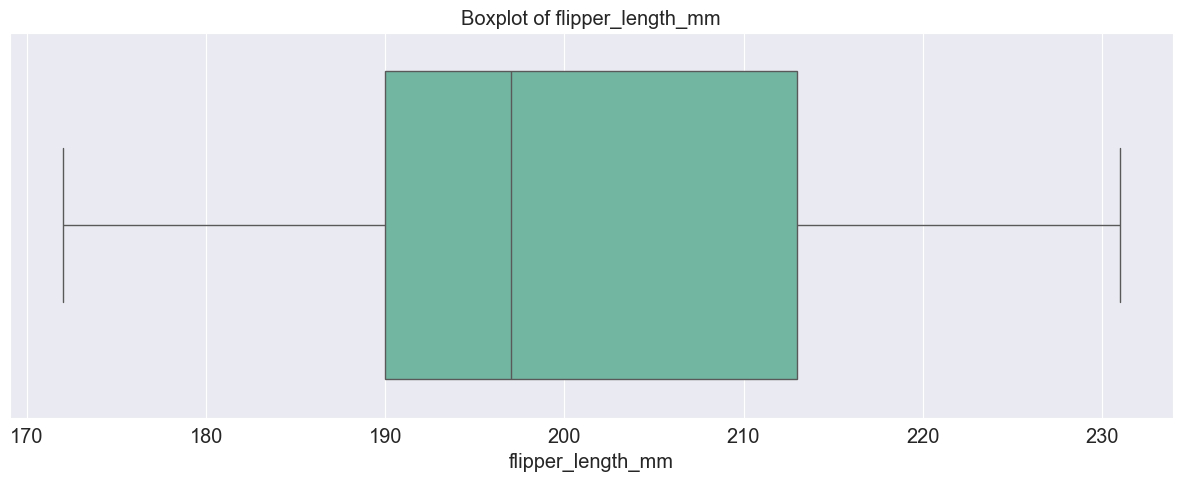

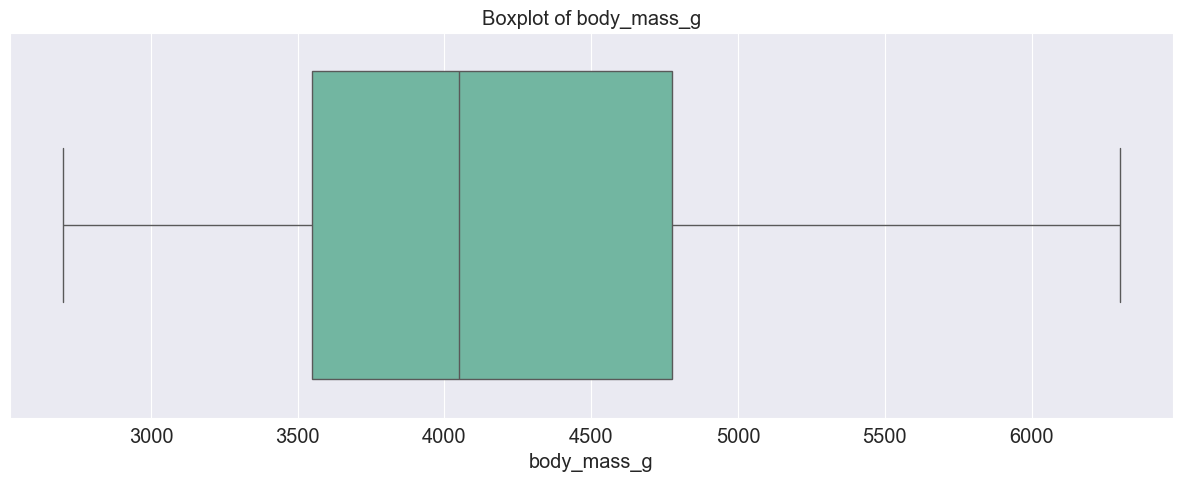


Unique values for sex column: ['MALE' 'FEMALE']


In [79]:
for column in dataset.columns:
    if dataset[column].dtype in ['float64']:
        sns.boxplot(x=dataset[column])
        plt.title(f'Boxplot of {column}')
        plt.show()
    else:
        print('\nUnique values for', column, 'column:', dataset[column].unique())

In [80]:
# One Hot Encoding
dataset = pd.get_dummies(dataset, columns=['island', 'sex'])
dataset = dataset.replace({True:1, False:0})

In [81]:
dataset.species.value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [82]:
dataset.species.replace(['Adelie', 'Gentoo', 'Chinstrap'], [1,2,3], inplace=True)

In [83]:
dataset

species  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0          1            39.1           18.7              181.0       3750.0   
1          1            39.5           17.4              186.0       3800.0   
2          1            40.3           18.0              195.0       3250.0   
4          1            36.7           19.3              193.0       3450.0   
5          1            39.3           20.6              190.0       3650.0   
..       ...             ...            ...                ...          ...   
338        2            47.2           13.7              214.0       4925.0   
340        2            46.8           14.3              215.0       4850.0   
341        2            50.4           15.7              222.0       5750.0   
342        2            45.2           14.8              212.0       5200.0   
343        2            49.9           16.1              213.0       5400.0   

     island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
0                0             0                 1           0         1  
1                0             0                 1           1         0  
2                0             0                 1           1         0  
4                0             0                 1           1         0  
5                0             0                 1           0         1  
..             ...           ...               ...         ...       ...  
338              1             0                 0           1         0  
340              1             0                 0           1         0  
341              1             0                 0           0         1  
342              1             0                 0           1         0  
343              1             0                 0           0         1  

[333 rows x 10 columns]

In [84]:
dataset.dtypes

species                int64
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
island_Biscoe          int64
island_Dream           int64
island_Torgersen       int64
sex_FEMALE             int64
sex_MALE               int64
dtype: object

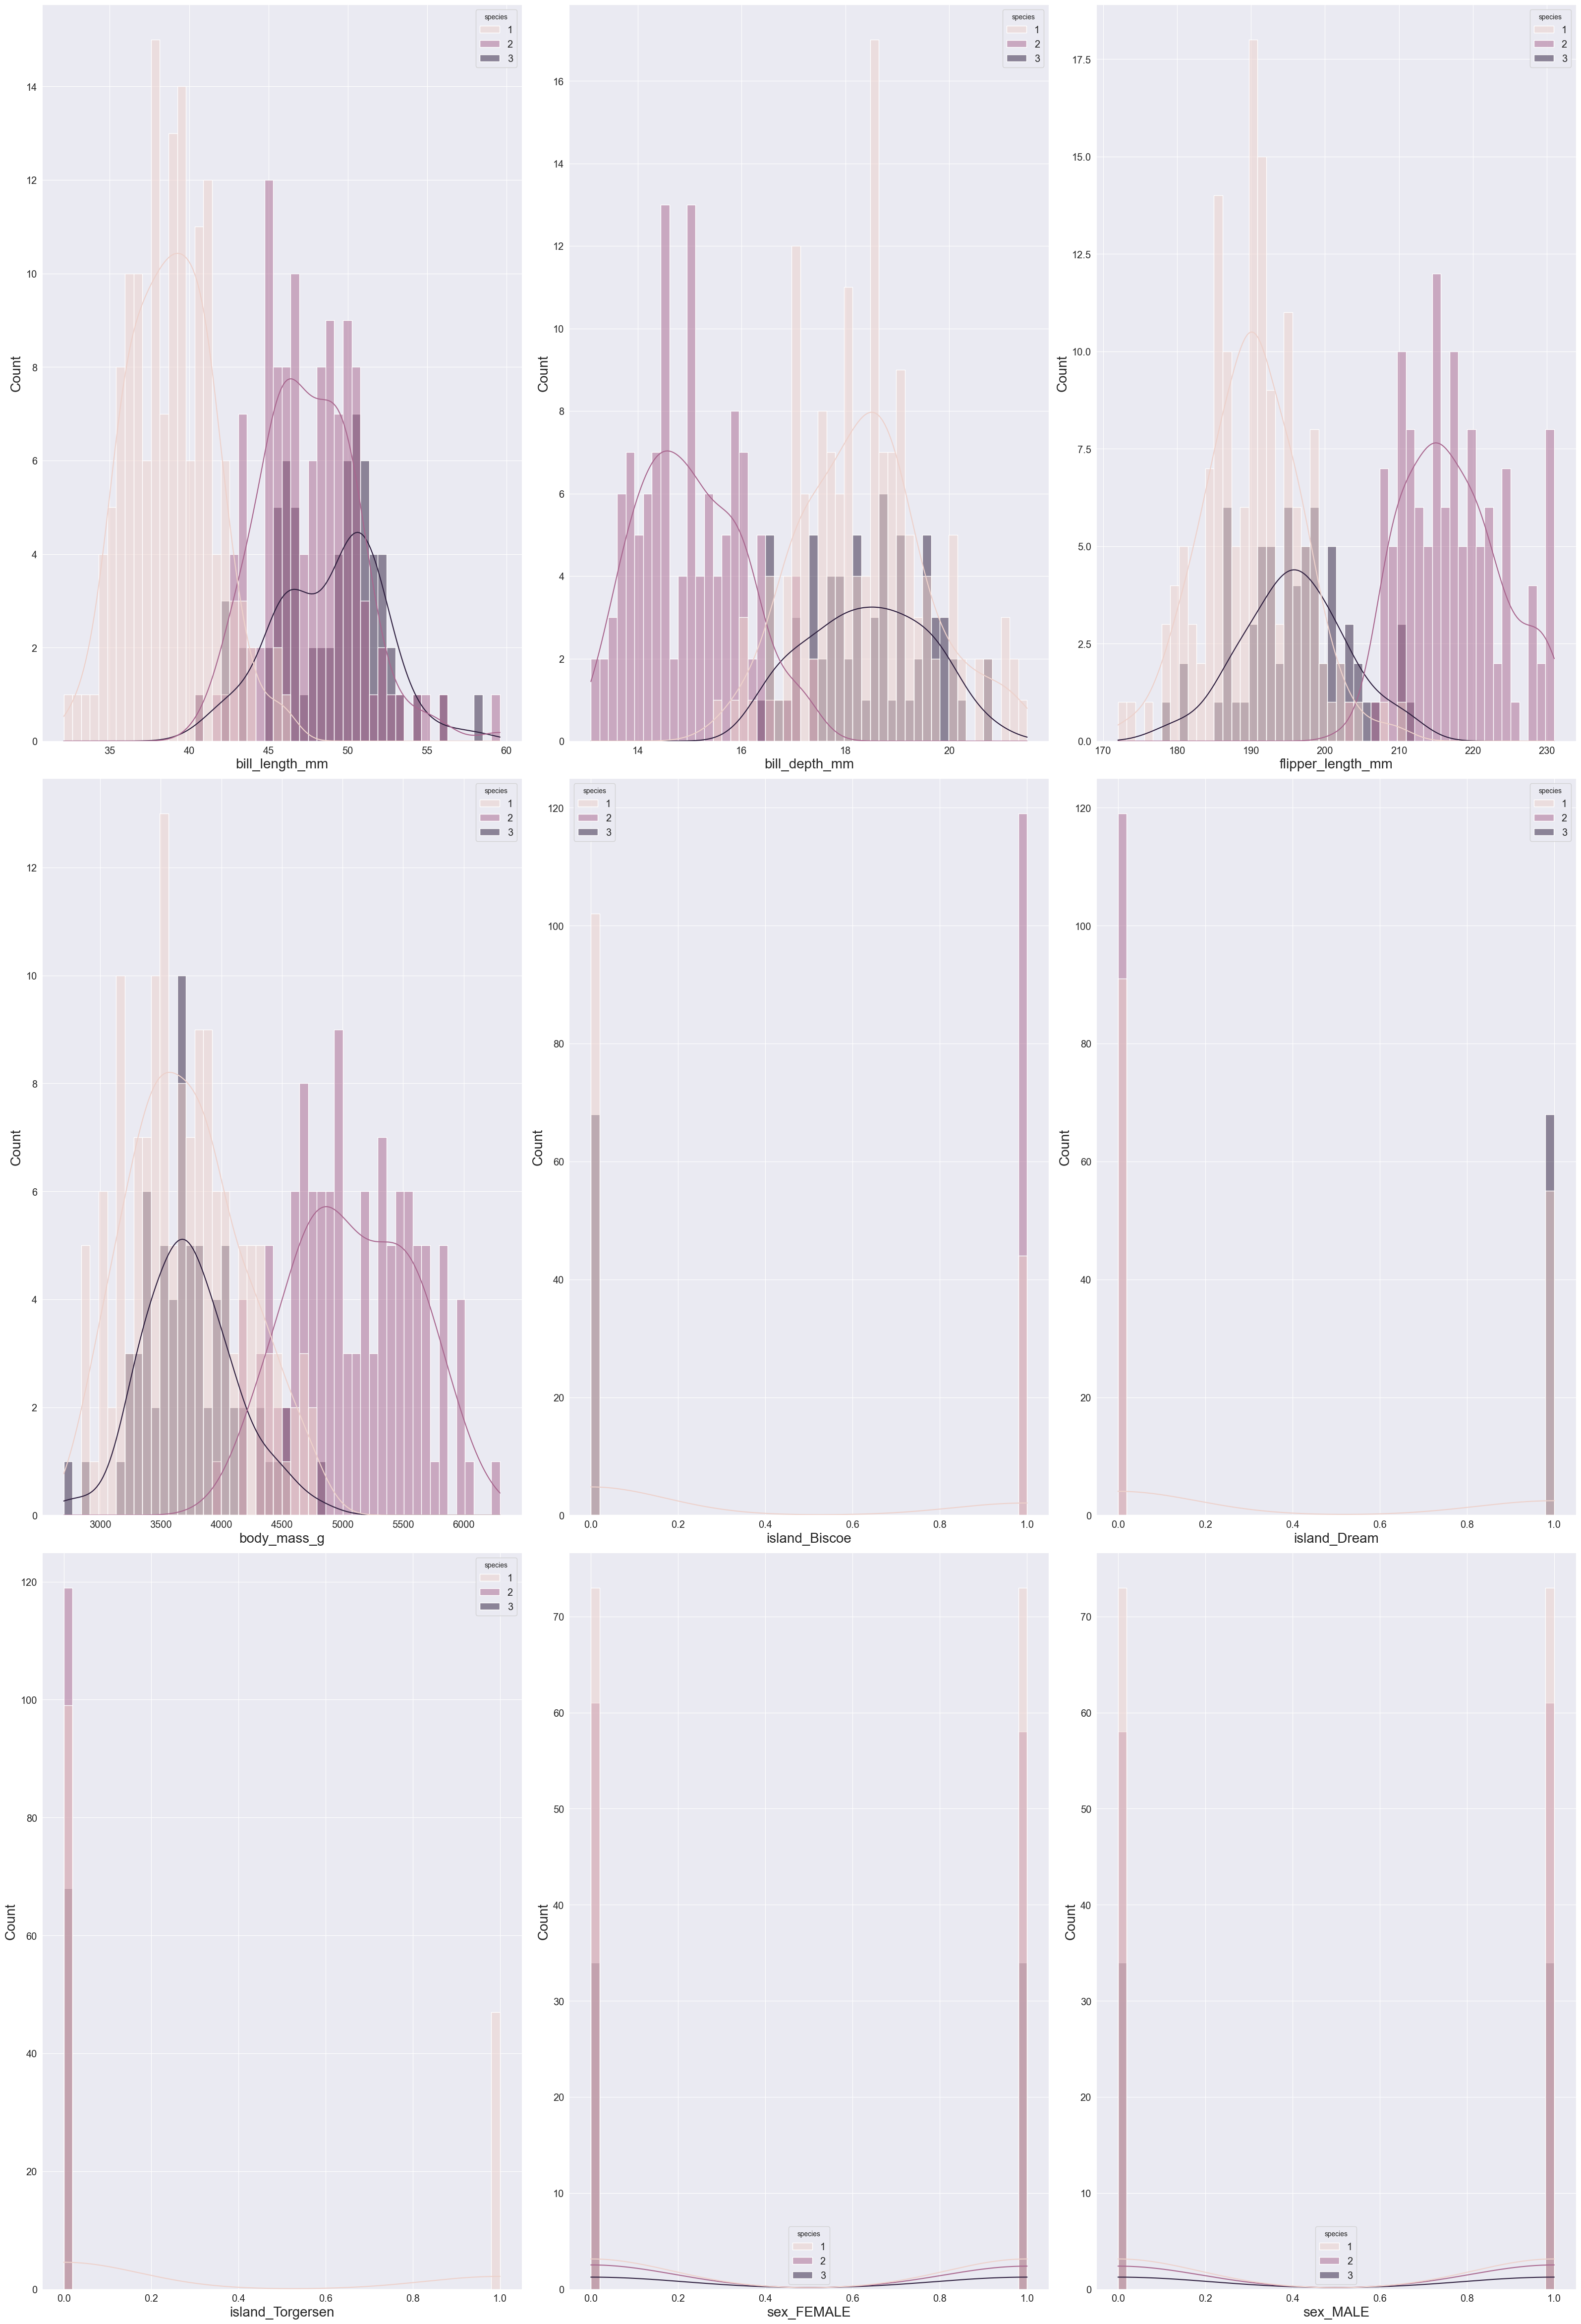

In [85]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.histplot(dataset, x=col, hue='species', kde=True, bins=50)

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('Count', fontsize=20)

plt.tight_layout()
plt.show()

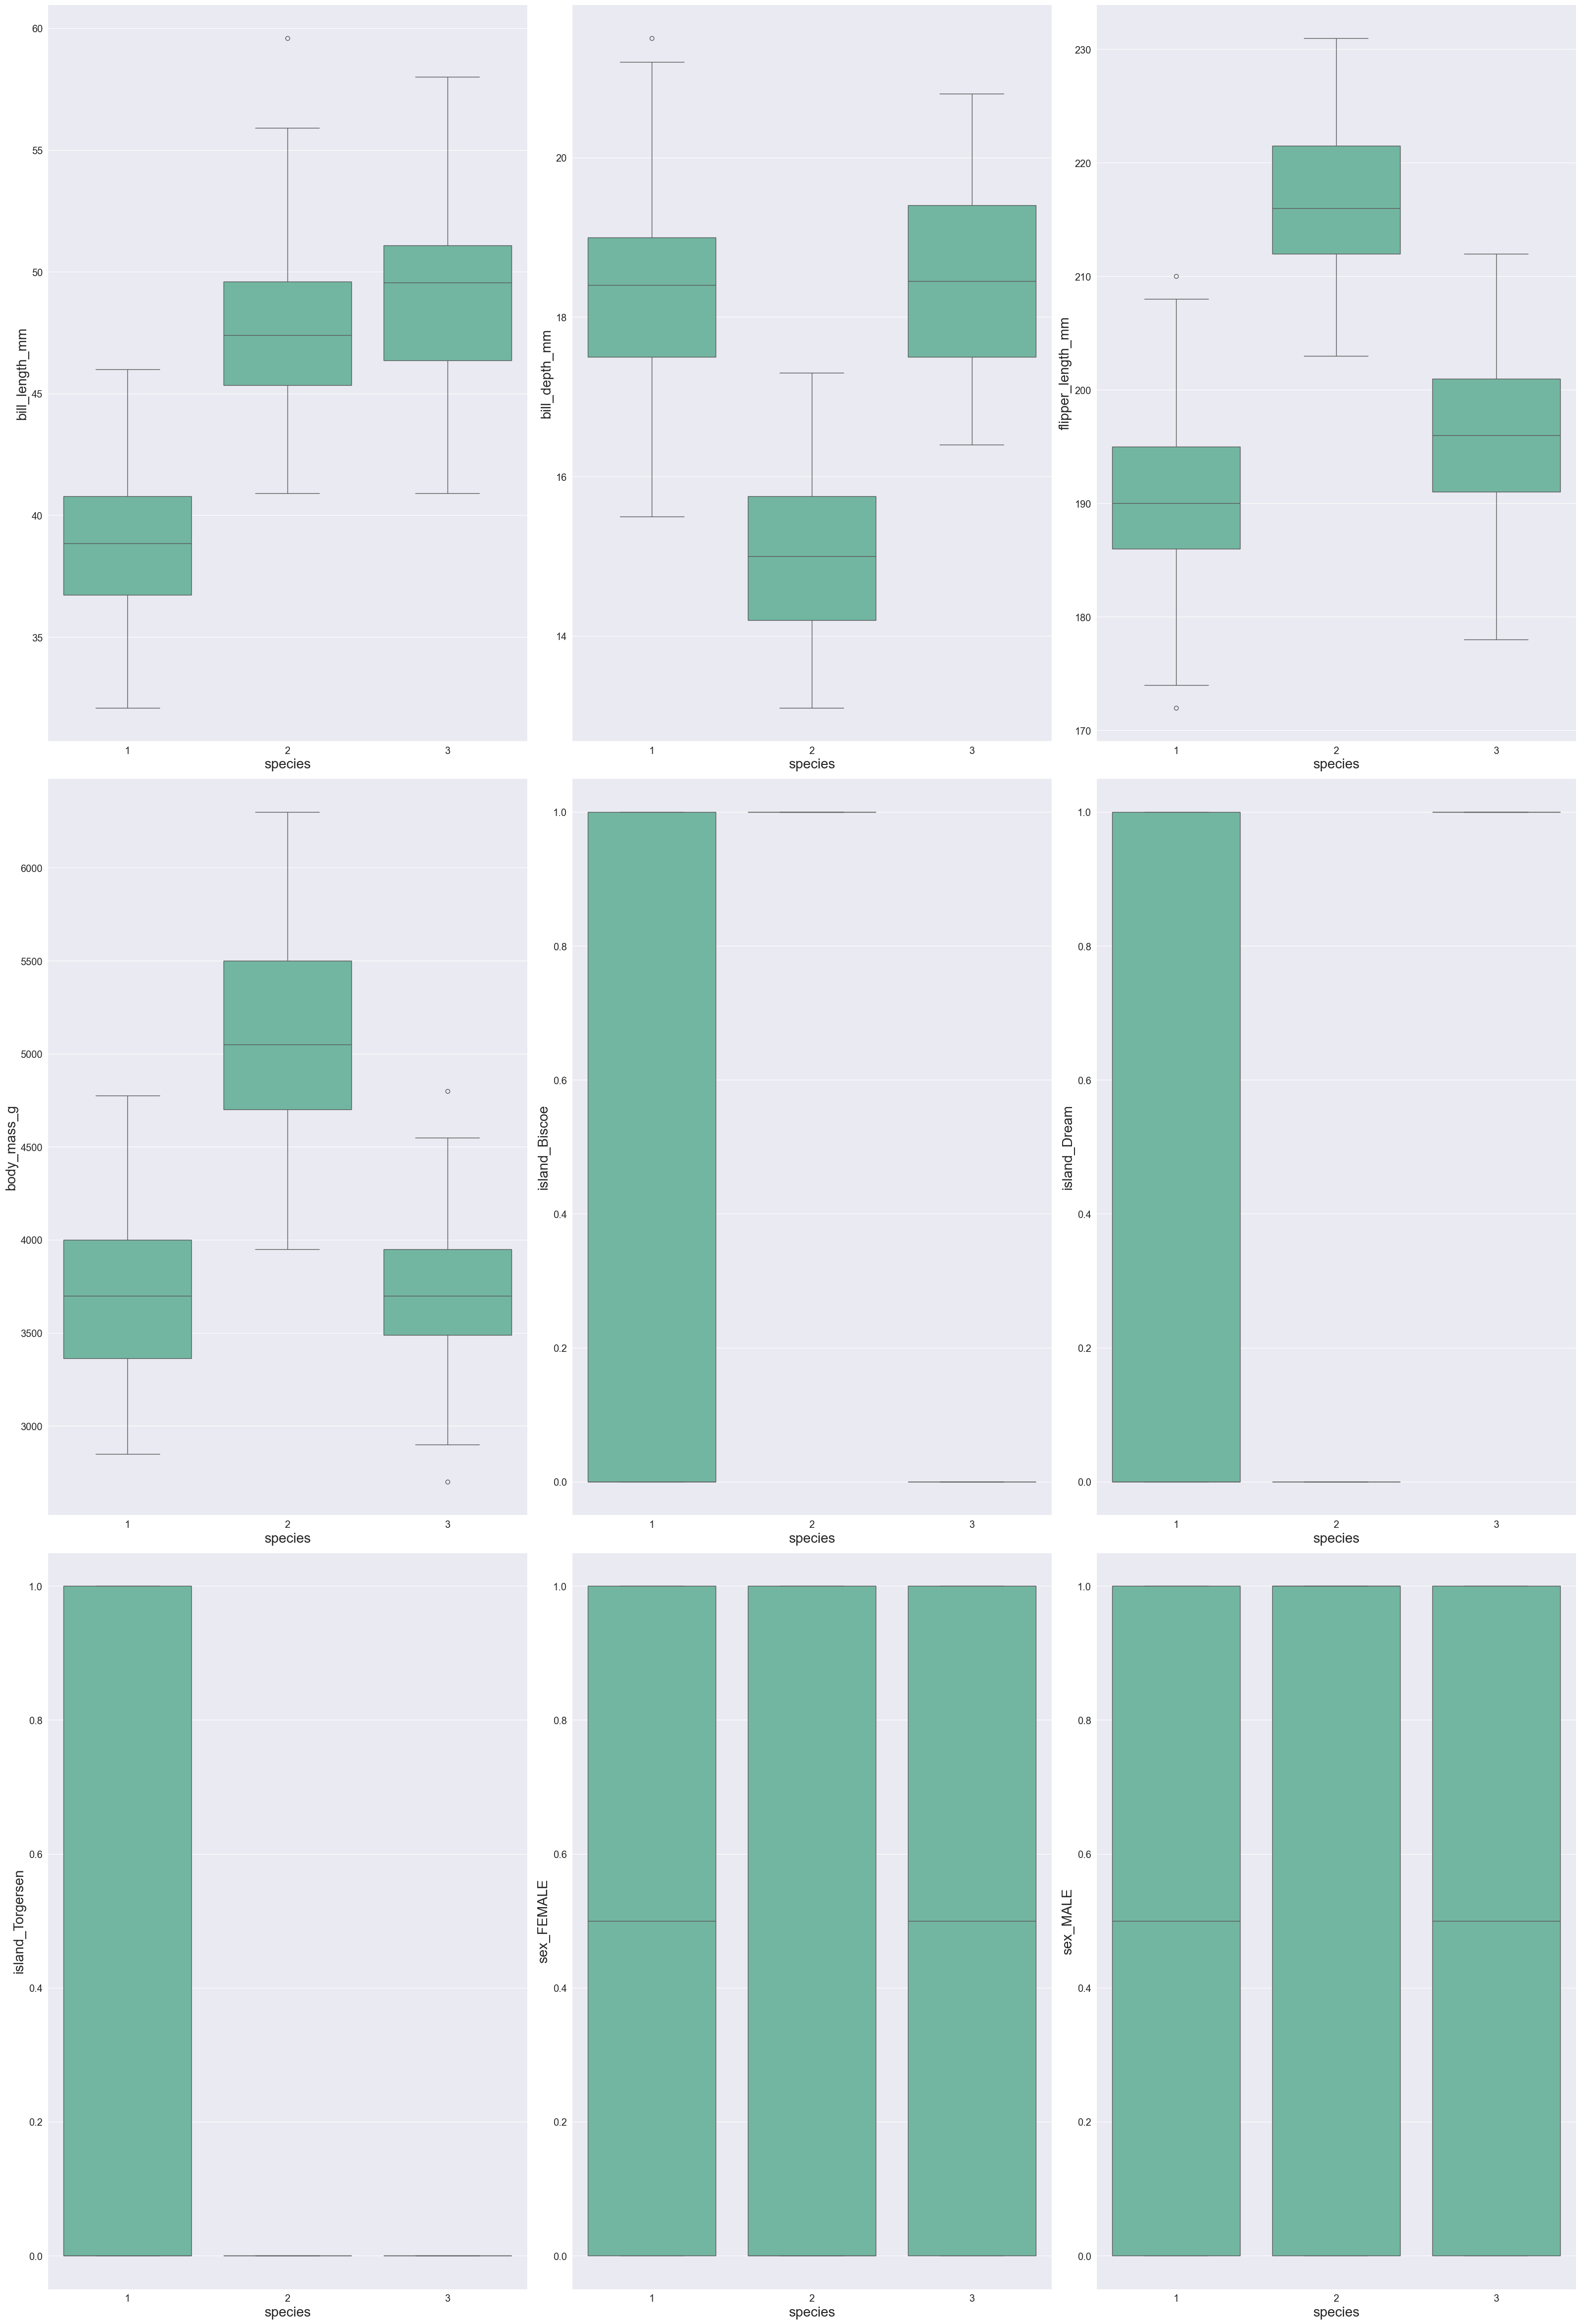

In [86]:
plt.figure(figsize=(32, 62))

num_cols = 3
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.boxplot(data=dataset, x='species', y=col)

    # Increase x-axis and y-axis title font size
    plt.xlabel('species', fontsize=20)
    plt.ylabel(col, fontsize=20)

plt.tight_layout()
plt.show()

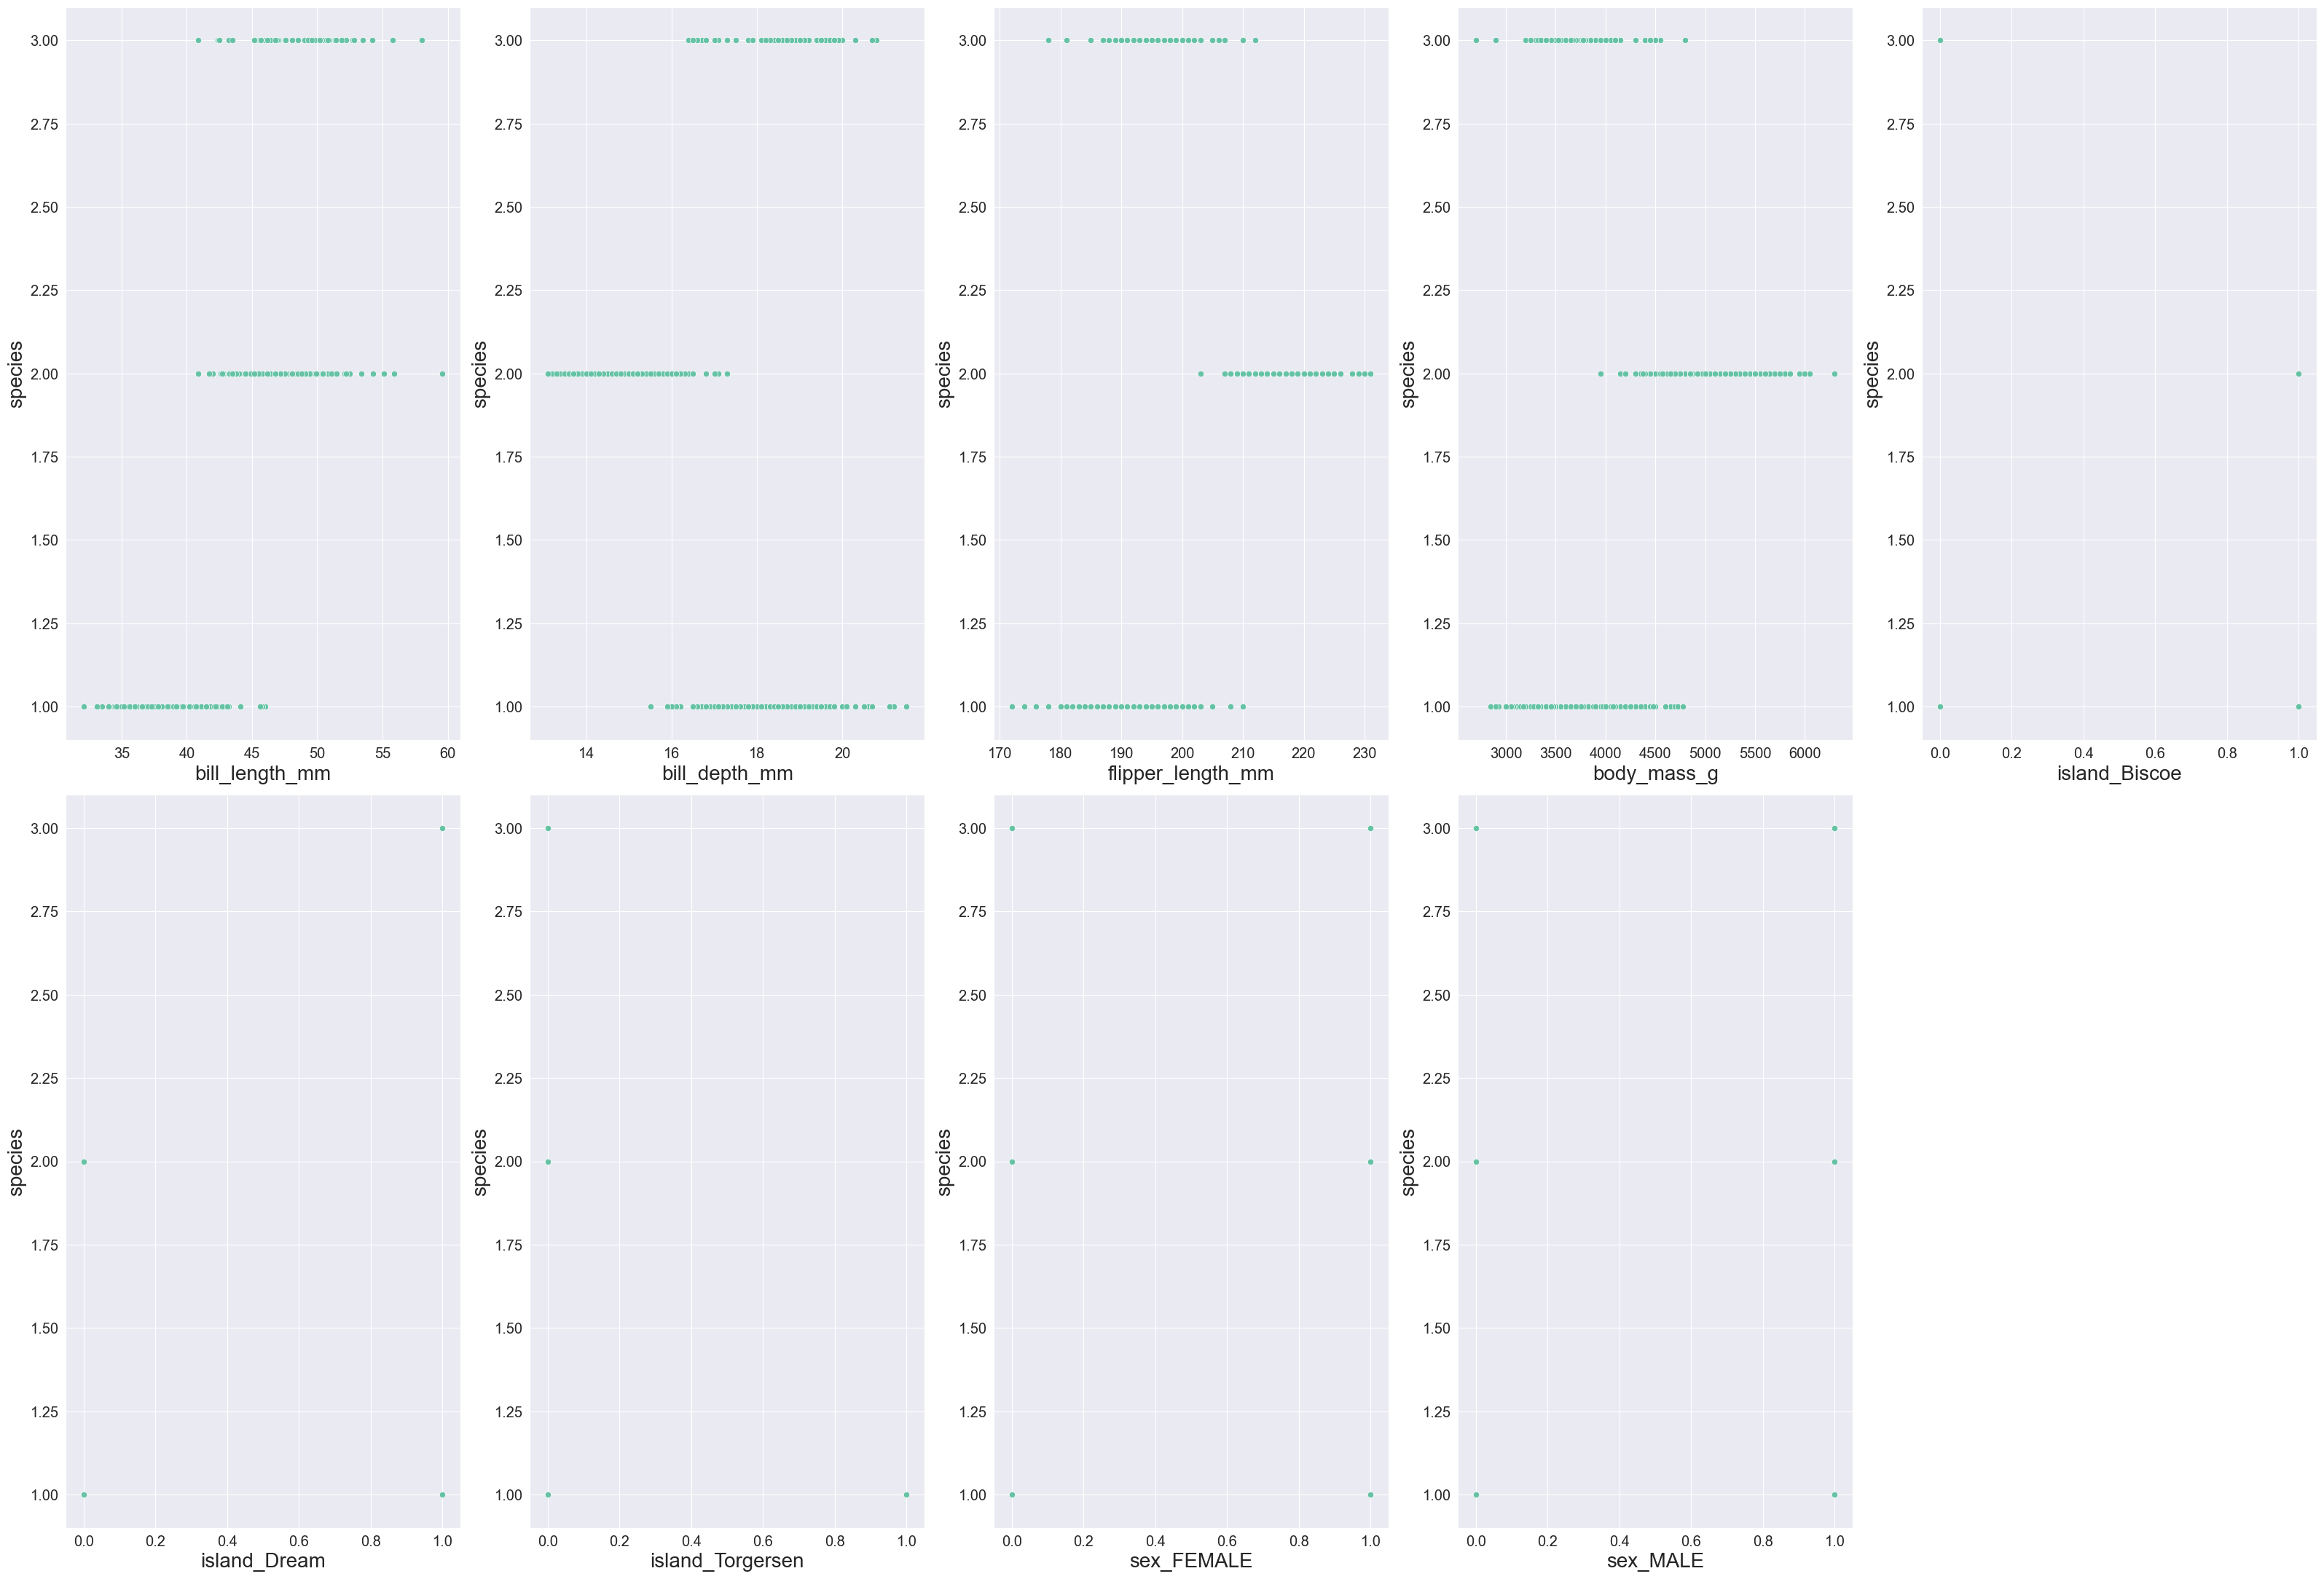

In [87]:
plt.figure(figsize=(32, 32))

num_cols = 5
num_rows = int(dataset.shape[1] / num_cols) + 1

for index, col in enumerate(dataset.drop('species', axis=1).columns):
    plt.subplot(num_rows, num_cols, index + 1)
    sns.scatterplot(data=dataset, x=col, y='species')

    # Increase x-axis and y-axis title font size
    plt.xlabel(col, fontsize=20)
    plt.ylabel('species', fontsize=20)

plt.tight_layout()
plt.show()

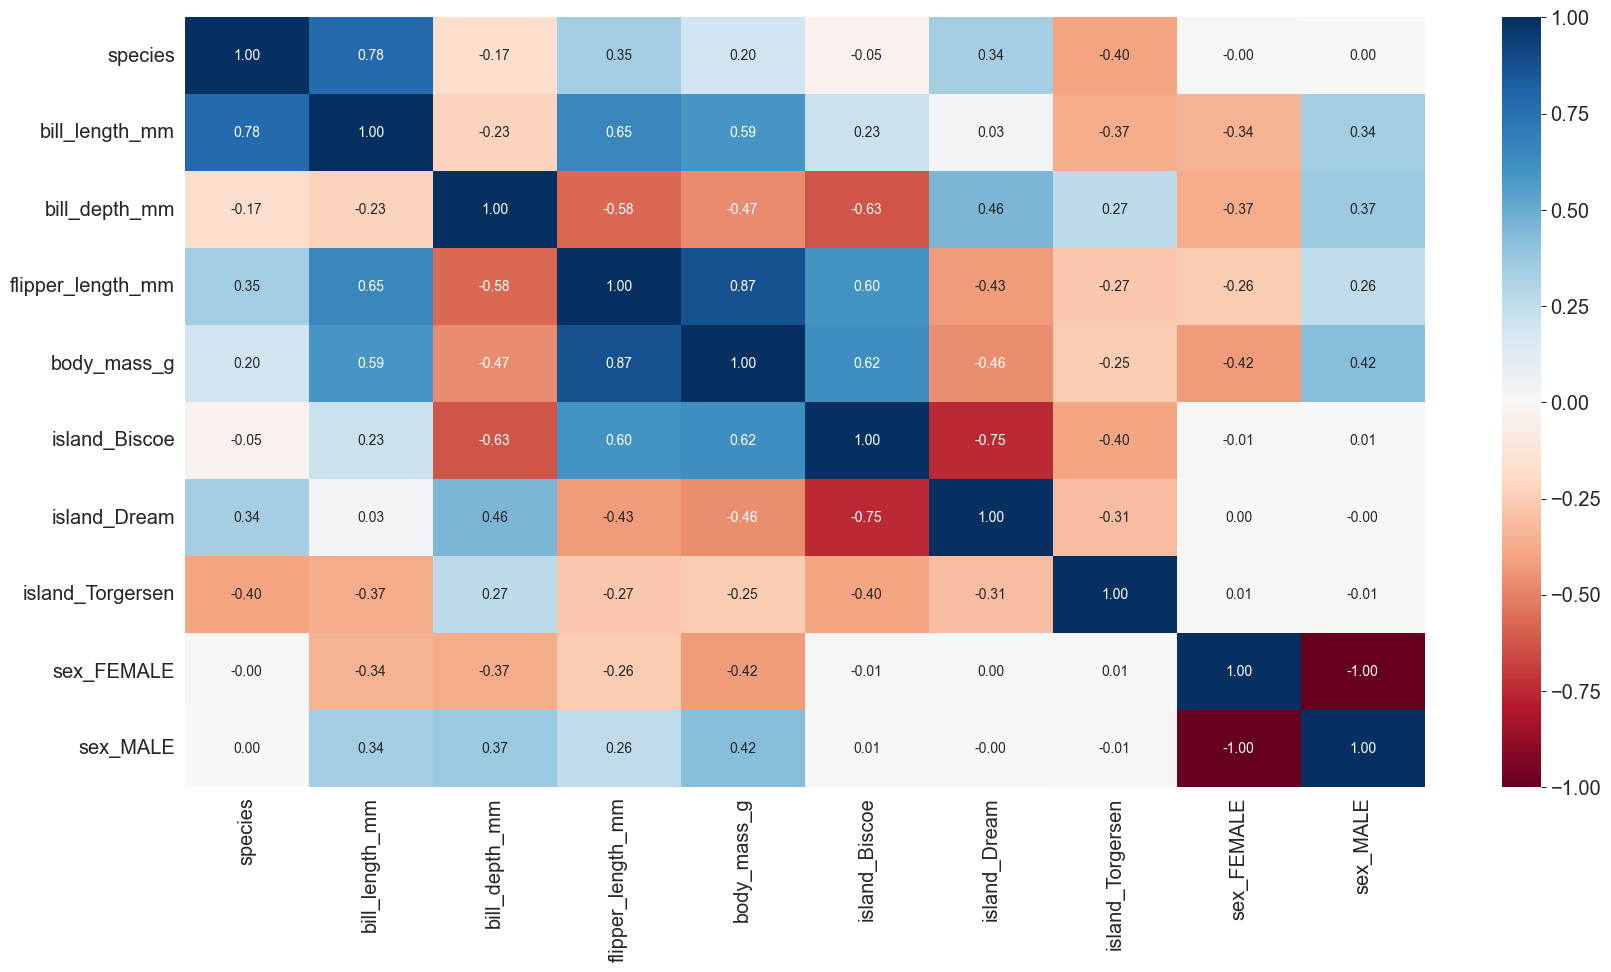

In [88]:
fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(dataset.corr(), cmap='RdBu', annot=True, fmt=".2f");

**Q2.1. Build a classification model using Decision Trees to predict the target variable `species` from the dataset.**

In [89]:
# Getting independent and dependent variables 
y = dataset.species.values
X = dataset.drop(['species'], axis=1)

In [90]:
# Splitting the dataset into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [91]:
X_train

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
321            55.9           17.0              228.0       5600.0   
265            43.6           13.9              217.0       4900.0   
36             38.8           20.0              190.0       3950.0   
308            47.5           14.0              212.0       4875.0   
191            53.5           19.9              205.0       4500.0   
..              ...            ...                ...          ...   
194            50.9           19.1              196.0       3550.0   
77             37.2           19.4              184.0       3900.0   
112            39.7           17.7              193.0       3200.0   
277            45.5           15.0              220.0       5000.0   
108            38.1           17.0              181.0       3175.0   

     island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
321              1             0                 0           0         1  
265              1             0                 0           1         0  
36               0             1                 0           0         1  
308              1             0                 0           1         0  
191              0             1                 0           0         1  
..             ...           ...               ...         ...       ...  
194              0             1                 0           0         1  
77               0             0                 1           0         1  
112              1             0                 0           1         0  
277              1             0                 0           0         1  
108              1             0                 0           1         0  

[249 rows x 9 columns]

In [92]:
X_test

bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
30             39.5           16.7              178.0       3250.0   
317            46.9           14.6              222.0       4875.0   
79             42.1           19.1              195.0       4000.0   
201            49.8           17.3              198.0       3675.0   
63             41.1           18.2              192.0       4050.0   
..              ...            ...                ...          ...   
247            47.8           15.0              215.0       5650.0   
122            40.2           17.0              176.0       3450.0   
146            39.2           18.6              190.0       4250.0   
182            40.9           16.6              187.0       3200.0   
96             38.1           18.6              190.0       3700.0   

     island_Biscoe  island_Dream  island_Torgersen  sex_FEMALE  sex_MALE  
30               0             1                 0           1         0  
317              1             0                 0           1         0  
79               0             0                 1           0         1  
201              0             1                 0           1         0  
63               1             0                 0           0         1  
..             ...           ...               ...         ...       ...  
247              1             0                 0           0         1  
122              0             0                 1           1         0  
146              0             1                 0           0         1  
182              0             1                 0           1         0  
96               0             1                 0           1         0  

[84 rows x 9 columns]

In [93]:
clf_dt = DecisionTreeClassifier(random_state=42)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.578125, 0.9166666666666666, 'flipper_length_mm <= 206.5\ngini = 0.643\nsamples = 249\nvalue = [106, 90, 53]\nclass = Adelie'),
 Text(0.34375, 0.75, 'bill_length_mm <= 43.35\ngini = 0.439\nsamples = 153\nvalue = [104, 1, 48]\nclass = Adelie'),
 Text(0.125, 0.5833333333333334, 'bill_length_mm <= 42.35\ngini = 0.057\nsamples = 103\nvalue = [100, 0, 3]\nclass = Adelie'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 95\nvalue = [95, 0, 0]\nclass = Adelie'),
 Text(0.1875, 0.4166666666666667, 'bill_depth_mm <= 17.9\ngini = 0.469\nsamples = 8\nvalue = [5, 0, 3]\nclass = Adelie'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Chinstrap'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]\nclass = Adelie'),
 Text(0.5625, 0.5833333333333334, 'island_Dream <= 0.5\ngini = 0.183\nsamples = 50\nvalue = [4, 1, 45]\nclass = Chinstrap'),
 Text(0.4375, 0.4166666666666667, 'body_mass_g <= 4612.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0]\nclass 

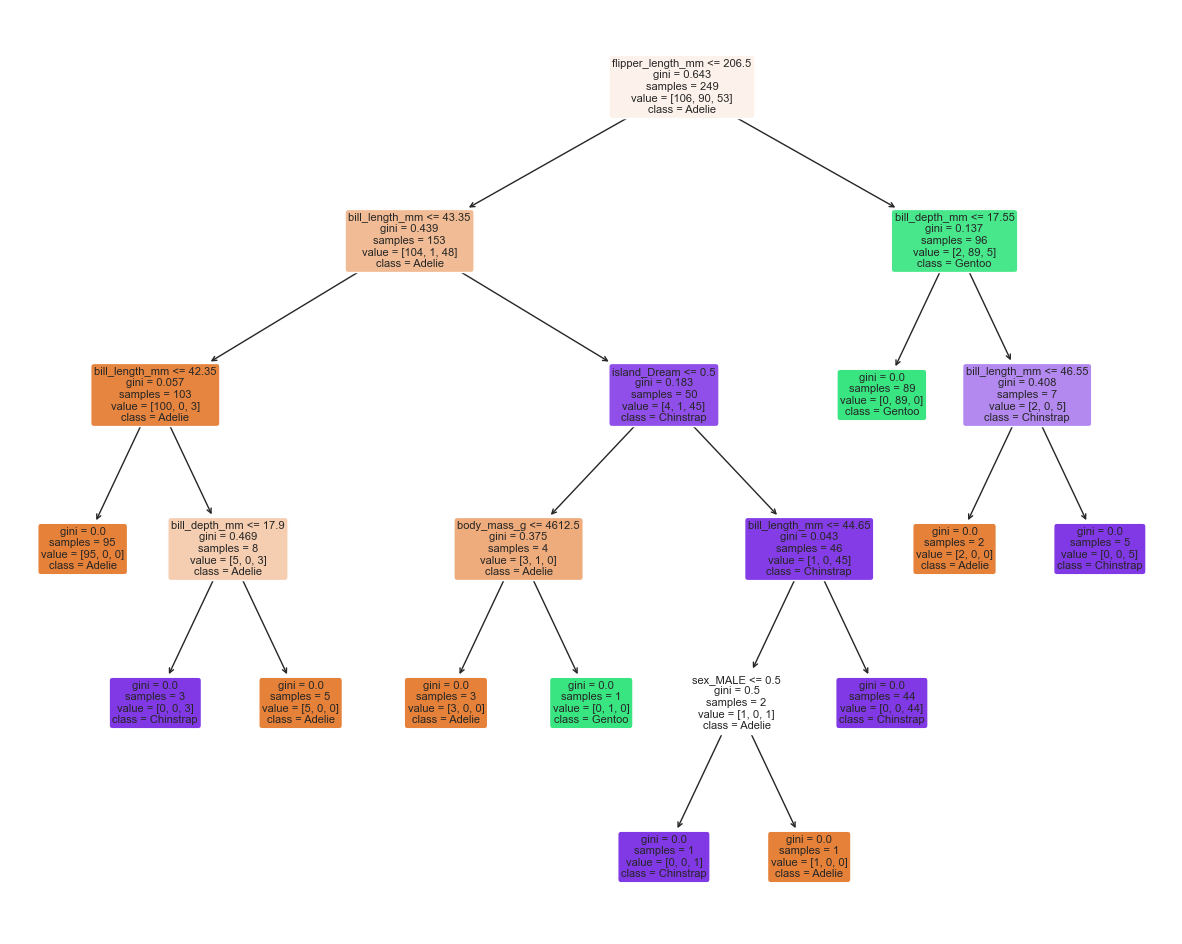

In [94]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=['Adelie', 'Gentoo', 'Chinstrap'], 
          feature_names=X.columns)

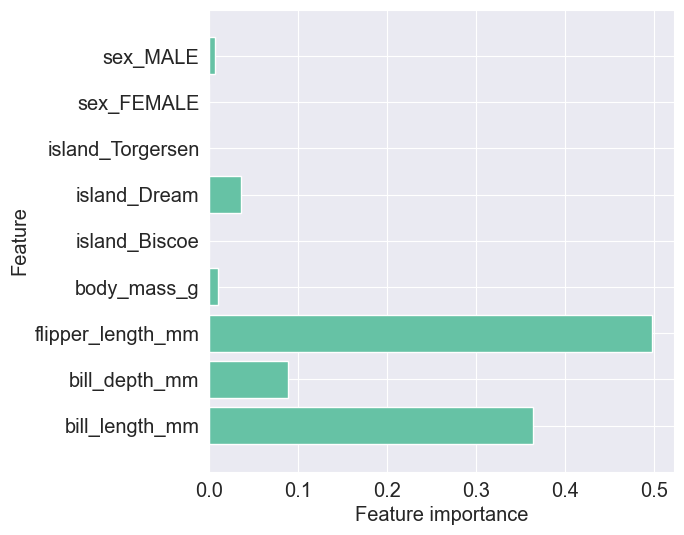

In [95]:
def plot_feature_importances_(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plt.figure(figsize=(6, 6))
plot_feature_importances_(clf_dt)

**Q2.2. Evaluate and discuss the model performance.**

In [96]:
y_pred = clf_dt.predict(X_test)

In [97]:
y_pred

array([1, 2, 1, 3, 1, 2, 2, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1,
       2, 3, 1, 1, 2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 3, 3,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 3, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1], dtype=int64)

In [98]:
y_test

array([1, 2, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1,
       2, 3, 1, 1, 2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 3, 3,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 3, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 3, 1], dtype=int64)

In [99]:
accuracy_score(y_pred, y_test)

0.9761904761904762

[[39  0  1]
 [ 0 29  0]
 [ 1  0 14]]


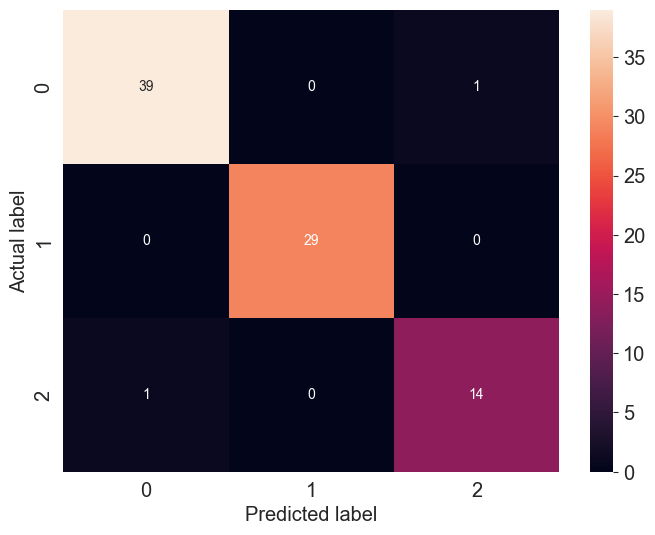

In [100]:
from sklearn.metrics import confusion_matrix
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [101]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        40
           2       1.00      1.00      1.00        29
           3       0.93      0.93      0.93        15

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84



**Answer:**

**Accuracy** - The accuracy of this model is 0.9761 which means that the model correctly predicts the class label for about 97.61% of probability.

**Precision** -  
> For class 'Adelie', the precision is 0.97, indicating that 97% of the samples predicted as class 'Adelie' are actually class 'Adelie'. 

> For class 'Gentoo', the precision is 1.00, indicating perfect precision class 'Gentoo'.

> For class 'Chinstrap', the precision is 0.93, indicating that 93% of the samples predicted as class 'Gentoo' are actually class 'Chinstrap'.

**Recall** - 
> For class 'Adelie', the recall is 0.97, indicating that 97% of the actual class 'Adelie' samples are correctly predicted as class 'Adelie'. 

> For class 'Gentoo', the recall is 1.00, indicating perfect recall for class 'Gentoo'.

> For class 'Chinstrap', the recall is 0.93, indicating that 93% of the actual class 'Chinstrap' samples are correctly predicted as class 'Chinstrap'.

**F1-score** - 
> For class 'Adelie', the F1-score is 0.97. 

> For class 'Gentoo', the F1-score is 1.00. 

> For class 'Chinstrap', the F1-score is 0.93.

**Confusion Matrix** - The confusion matrix further supports the model's strong performance. The majority of the samples are correctly classified, with only a few misclassifications observed. For example, there are only a few instances where samples from one class are misclassified as another.

Overall, the model demonstrates excellent performance across multiple evaluation metrics, including accuracy, precision, recall, F1-score, and the confusion matrix. It appears to be robust and reliable for making predictions on the given dataset.

**Q2.3. Use the Cost Complexity Pruning method to prune the decision tree to avoid overfitting.**

In [102]:
# Extracting the different values of alpha that are available for this tree and 
# Build a pruned tree for each value of ccp_alpha
path = clf_dt.cost_complexity_pruning_path(X_train, y_train) # Determine values for alpha
# Omit the maximum value for alpha, because it would prune all leaves, leaving us with only the root of the tree 
ccp_alphas = path.ccp_alphas[:-1] # Extract different values for alpha and omit the maximum value 

clf_dts = [] # Creating an array to store the created decision trees 

# For each value for alpha, create a decision tree and store it in the clf_dts array 
for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)

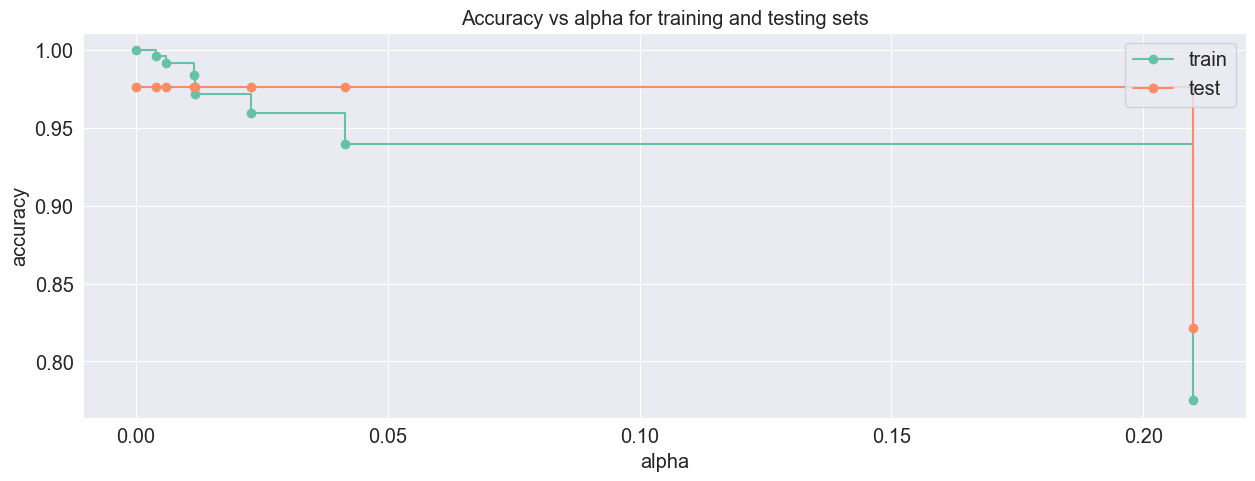

In [103]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel('alpha')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy vs alpha for training and testing sets')
ax.plot(ccp_alphas, train_scores, marker='o', label='train', drawstyle='steps-post')
ax.plot(ccp_alphas, test_scores, marker='o', label='test', drawstyle='steps-post')
ax.legend()
plt.show()

<Axes: xlabel='tree'>

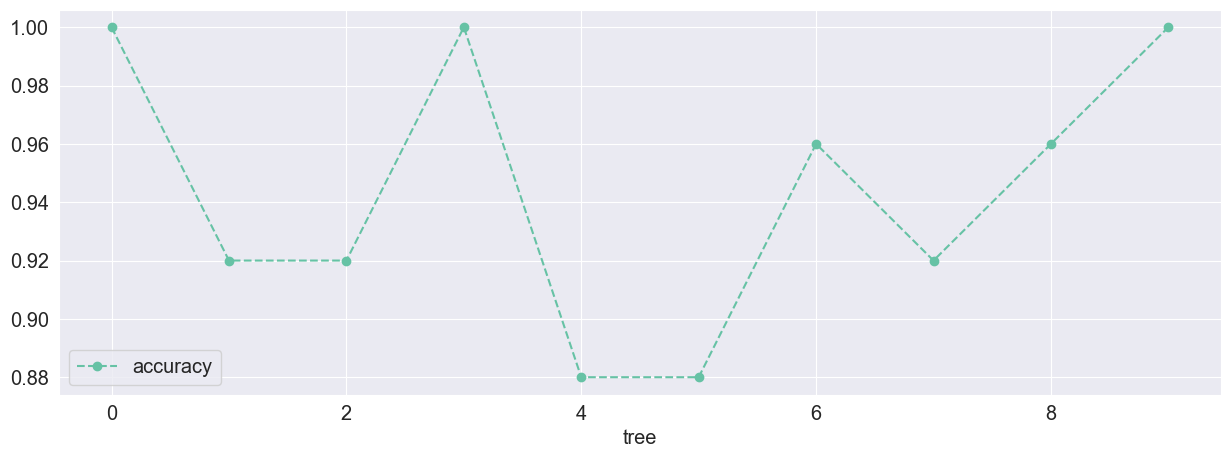

In [104]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.05/4)

scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
df = pd.DataFrame(data={'tree': range(10), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker='o', linestyle='--')

<Axes: xlabel='alpha'>

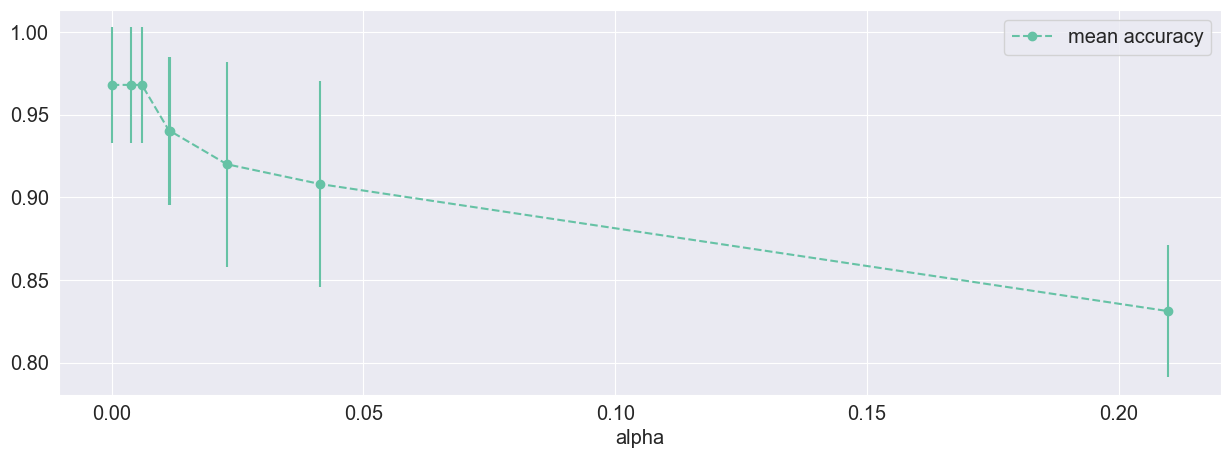

In [105]:
# Create a list to store the results of each fold during cross validation 
alpha_loop_values = []

# For each candidate value for alpha, we run 10-fold cross validation.
# Then, we will store the mean and standard deviation of the scores (the accuracy) 
# for each call cross_val_score in alpha_loop_values list

for ccp_alpha in ccp_alphas:
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    scores = cross_val_score(clf_dt, X_train, y_train, cv=10)
    alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])
    
# Now we can visualize the means and standard deviations of the scores for each candidate of alpha
alpha_results = pd.DataFrame(alpha_loop_values,
                             columns=['alpha', 'mean accuracy', 'std'])

alpha_results.plot(
    x='alpha',
    y='mean accuracy',
    yerr='std',
    marker='o',
    linestyle='--'
)

In [106]:
alpha_results['mean accuracy'].max()

0.968

In [107]:
alpha_results['mean accuracy'].idxmax()

0

In [108]:
ideal_ccpa_alpha = alpha_results.iloc[alpha_results['mean accuracy'].idxmax()]['alpha']
ideal_ccpa_alpha

0.0

In [109]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccpa_alpha)
clf_dt = clf_dt.fit(X_train, y_train)

[Text(0.578125, 0.9166666666666666, 'flipper_length_mm <= 206.5\ngini = 0.643\nsamples = 249\nvalue = [106, 90, 53]\nclass = Adelie'),
 Text(0.34375, 0.75, 'bill_length_mm <= 43.35\ngini = 0.439\nsamples = 153\nvalue = [104, 1, 48]\nclass = Adelie'),
 Text(0.125, 0.5833333333333334, 'bill_length_mm <= 42.35\ngini = 0.057\nsamples = 103\nvalue = [100, 0, 3]\nclass = Adelie'),
 Text(0.0625, 0.4166666666666667, 'gini = 0.0\nsamples = 95\nvalue = [95, 0, 0]\nclass = Adelie'),
 Text(0.1875, 0.4166666666666667, 'bill_depth_mm <= 17.9\ngini = 0.469\nsamples = 8\nvalue = [5, 0, 3]\nclass = Adelie'),
 Text(0.125, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]\nclass = Chinstrap'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 5\nvalue = [5, 0, 0]\nclass = Adelie'),
 Text(0.5625, 0.5833333333333334, 'island_Dream <= 0.5\ngini = 0.183\nsamples = 50\nvalue = [4, 1, 45]\nclass = Chinstrap'),
 Text(0.4375, 0.4166666666666667, 'body_mass_g <= 4612.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1, 0]\nclass 

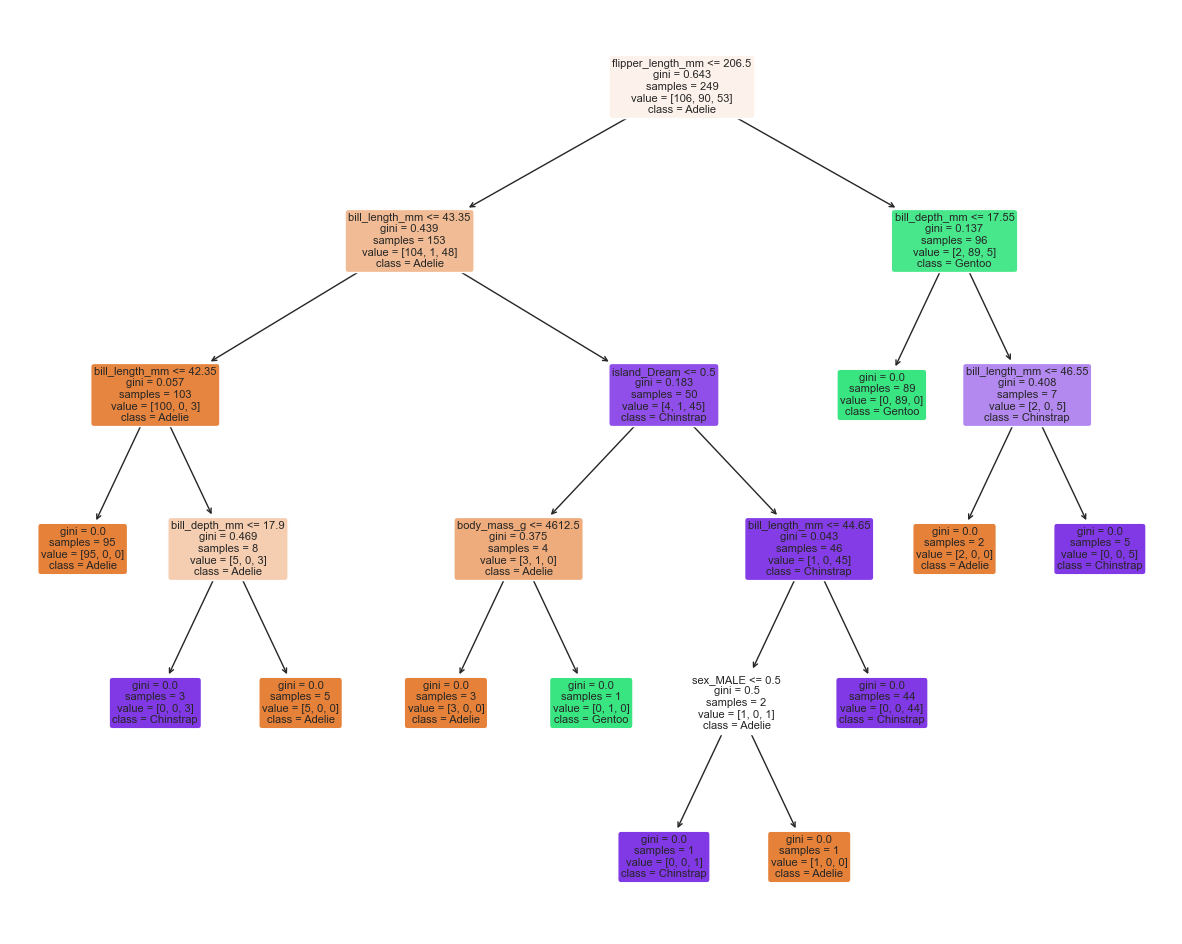

In [110]:
plt.figure(figsize=(15, 12))
plot_tree(clf_dt, 
          filled=True, 
          rounded=True, 
          class_names=['Adelie', 'Gentoo', 'Chinstrap'], 
          feature_names=X.columns)

**Q2.4. Evaluate and discuss the model performance after the pruning.**

In [111]:
y_pred = clf_dt.predict(X_test)

In [112]:
y_pred

array([1, 2, 1, 3, 1, 2, 2, 3, 3, 3, 3, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1,
       2, 3, 1, 1, 2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 3, 3,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 3, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1], dtype=int64)

In [113]:
y_test

array([1, 2, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1,
       2, 3, 1, 1, 2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 3, 3,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 3, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 3, 1], dtype=int64)

In [114]:
accuracy_score(y_pred, y_test)

0.9761904761904762

[[39  0  1]
 [ 0 29  0]
 [ 1  0 14]]


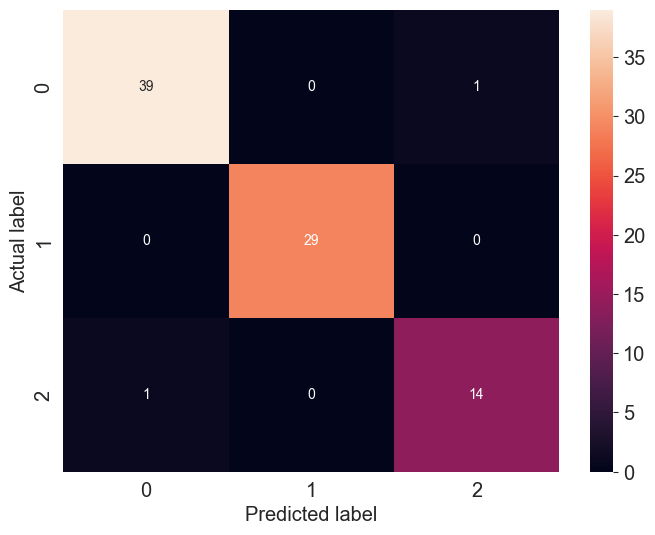

In [115]:
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [116]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.97      0.97      0.97        40
           2       1.00      1.00      1.00        29
           3       0.93      0.93      0.93        15

    accuracy                           0.98        84
   macro avg       0.97      0.97      0.97        84
weighted avg       0.98      0.98      0.98        84



**Answer:** The performance of the model after the pruning is the same as the model before the pruning. All the performance metrics (Accuracy, Precision, Recall, F1-score, and Confusion Matrix) yield the same result. This is because the value of ideal_ccpa_alpha was 0.0. As the model that was built before pruning takes the value of alpha as 0.0 by default, both the models are the same and thus resulted in identical performance metrics.

**Q2.5. Build a classification model using Random Forests to predict the target variable `species` from the dataset.**

In [117]:
clf_rf = RandomForestClassifier(n_estimators=100) # , max_depth=5, random_state=1
clf_rf.fit(X_train, y_train)

RandomForestClassifier()

**Q2.6. Evaluate and discuss the model performance in contrast to the previous models (before and after the pruning).**

In [118]:
y_pred = clf_rf.predict(X_test)

In [119]:
y_pred

array([1, 2, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1,
       2, 3, 1, 1, 2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 3, 3,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 3, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 1, 1], dtype=int64)

In [120]:
y_test

array([1, 2, 1, 3, 1, 2, 2, 3, 3, 3, 1, 1, 2, 1, 2, 1, 1, 3, 1, 2, 1, 1,
       2, 3, 1, 1, 2, 2, 3, 2, 3, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 1, 3, 3,
       1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 2, 1, 1, 3, 3, 2, 2, 2, 1, 1, 2,
       1, 2, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 1, 2, 1, 1, 3, 1], dtype=int64)

In [121]:
accuracy_score(y_pred, y_test)

0.9880952380952381

[[40  0  0]
 [ 0 29  0]
 [ 1  0 14]]


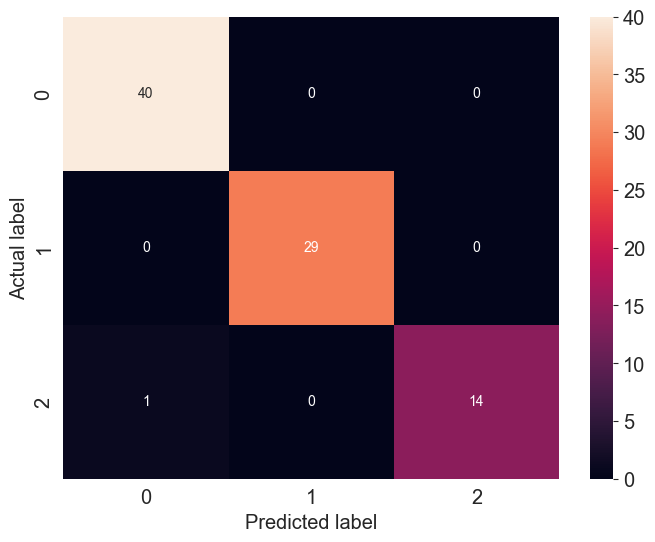

In [122]:
plt.figure(figsize=(8,6))

print(confusion_matrix(y_test,y_pred))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d')
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

In [123]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        40
           2       1.00      1.00      1.00        29
           3       1.00      0.93      0.97        15

    accuracy                           0.99        84
   macro avg       0.99      0.98      0.98        84
weighted avg       0.99      0.99      0.99        84



**Answer:**

**Accuracy** - The accuracy of our Random Forests model is 0.9880 which means that the model correctly predicts the class label for about 98.80% of probability, whereas the Decision Tree model had slightly less accuracy of 97.61%.

**Precision** -
> For class 'Adelie', the precision is 0.98, indicating that 98% of the samples predicted as class 'Adelie' are actually class 'Adelie', whereas the prior Decision Trees model had slightly less precision of 97%.

> For class 'Gentoo', the precision is 1.00, indicating perfect precision class 'Gentoo', which is the same for the Decision Trees model.

> For class 'Chinstrap', the precision is 1.00, indicating perfect precision class 'Gentoo', whereas the prior Decision Trees model had less precision of 93%.

**Recall** - The Recall for the classes (Gentoo, and Chinstrap) is the same for both the Random Forests model and the Decision Trees model i.e. 1.0 and 0.93 respectively whereas the Recall for class Adelie is better in the Random Forests model in comparison with the Decision Trees model i.e. 1.0 and 0.97 respectively.

**F1-score** - 
> For class 'Adelie', the F1-score is 0.99, whereas the prior Decision Trees model had slightly less F1-score of 97%. 

> For class 'Gentoo', the F1-score is 1.00, which is the same for the Decision Trees model.

> For class 'Chinstrap', the F1-score is 0.97, whereas the prior Decision Trees model had less F1-score of 93%. 

**Confusion Matrix** - The confusion matrix demonstrates that all the output except 1 is perfectly predicted as their actual class i.e. 40, 29, and 14 samples were correctly classified as class Adelie, Gentoo, and Chinstrap. The 1 sample that is incorrectly classified is Chinstrap which is mistakenly classified as Adelie.

The confusion matrix of the decision tree also demonstrates a similar number except for the correction of 1 number which was incorrectly classified as Chinstrap was correctly classified in the Random Forests model.

Overall, the model demonstrates excellent performance across multiple evaluation metrics, including accuracy, precision, recall, F1-score, and the confusion matrix. It appears to be robust and reliable for making predictions on the given dataset.

**Q2.7. Compare the performance of your logistic regression model from Lab 2 to the performance of decision tree and random forest from this lab.**

**Answer:** The performance metrics can be visualized using the following table:
| Performance Metrics | Logistic Regression | Pruned Decision Trees | Random Forests |
|----------|----------|----------|----------|
| Accuracy | 75% | 97.61% | 98.80% |
| Precision for 'Adelie' class | 72% | 97% | 98% |
| Precision for 'Gentoo' class | 79% | 100% | 100% |
| Precision for 'Chinstrap' class | 0% | 93% | 100% |
| Recall for 'Adelie' class | 86% | 97% | 100% |
| Recall for 'Gentoo' class | 96% | 100% | 100% |
| Recall for 'Chinstrap' class | 0% | 93% | 93% |
| F1-score for 'Adelie' class | 78% | 97% | 99% |
| F1-score for 'Gentoo' class | 87% | 100% | 100% |
| F1-score for 'Chinstrap' class | 0% | 93% | 97% |

From this table, it is clear that all the performance metrics i.e. Accuracy, Precision, Recall, and F1-score are the lowest for the Logistic Regression model that was constructed in Lab 2, whereas the performance of our Decision Trees model constructed in this lab is better in comparison with the Logistic Regression. But, in comparison with the Random Forests model, the performance of our Decision Trees model is less.

**Q2.8. Which model would you choose for this classification problem (logistic regression, decision tree, or random forest) and why?**

**Answer:** Since, the performance of the Random Forests model is better in terms of all the performance metrics i.e. Accuracy, Precision, Recall, and F1-score in comparison with the Decision Trees model and Logistic Regression model, I would choose Random Forests model for this classification problem.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity. 
2. A reflection on the importance of learning this activity.
**Note:** include your reflection in this notebook as markdown cells. 

**Answer:**

1. This week, I found this activity more interesting. The videos that were posted for the lecture and implementation of Decision Trees and Random Forests made it easier for me to stop and replay the section of the topic I was confused with. This enabled me to have a better understanding of the topic and it made me do this lab easily. Also, the dataset used in this lab was the same as that we had used in Lab 2. Therefore, the preprocessing and visualizing steps were the same which let me focus on the other part of this activity i.e. building the model itself and understanding it.
   
3. I think this portion of learning is very important as it deals with real-world scenarios and solving real-world problems. The Decision Tress and Random Forests models can be used for both linear regression i.e. prediction and logistic regression i.e. classification of supervised learning algorithm. Therefore, its importance can be clearly identified from here, and during this activity, the concepts were visualized easily.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab3.ipynb** to the **Lab 3 - Binary and Multi-class Classification Using Decision Trees and Random Forests (Dropbox)** on D2L by the due date. 

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 1.8|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.6|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.7|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2.8|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection